# Optimizing Profits: Discover Property Treasures Using Cutting-Edge AI and Data Mining

## Business Problem

### Introduction:

Welcome to the Property Investment Challenge! Our client, an investment fund, is on a mission to maximize returns on real estate investments. In this dynamic and competitive market, the fund is looking to leverage cutting-edge AI and data mining techniques to identify and invest in properties with the highest potential for profitability. The goal is to optimize the allocation of resources and strategically select properties that can yield substantial returns on investment.

### Challenge Overview:

The investment fund is planning to make a significant number of property investments, and the key to success lies in the ability to identify properties that offer substantial returns. The challenge is rooted in a vast dataset that spans the last 23 years, encompassing millions of property sales. The fund envisions a solution that can effectively segment these properties, enabling them to leverage sophisticated machine learning and analytics to quickly identify target properties for investment.

### Key Objectives:

1. **Predictive Modeling:**
   - Develop robust machine learning models capable of accurately predicting property sale prices. These models should take into account various factors such as location, estimated price, and other relevant features.

2. **Segmentation:**
   - After predicting sale prices, segment the properties into four distinct categories based on the calculated gain. The gain is calculated using the formula: `(Sale price - Estimated price)/100`.
     - **Segment 0: Premium Properties 💰🏰**
     - **Segment 1: Valuable Properties 💎🏡**
     - **Segment 2: Standard Properties 🏘️💸**
     - **Segment 3: Budget Properties 🏠💵**

### Dataset:

Participants will be provided with a comprehensive property dataset spanning the last 23 years. This dataset includes information such as property location, estimated price, selling price, and other relevant details.

### Expected Outcome:

The investment fund anticipates a solution that can not only accurately predict property sale prices but also categorize them into distinct segments. This segmentation will empower the fund to make well-informed decisions, strategically investing in properties that align with their overarching goal of maximizing returns.

### Evaluation:

Submissions will be assessed based on the performance metric relevant to regression tasks. The chosen metric should accurately reflect the model's ability to predict continuous numerical values, such as property sale prices. Participants are encouraged to select a metric aligned with the competition's goals and dataset characteristics, using it as a guiding measure for model accuracy and improvement.

Let the challenge begin, and may the best solution unlock the potential of property treasures! 🏡💎


In [4]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [7]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Pucon-24/Training.csv')
df.head()

,Date,crime_rate,renovation_level,Year,Address,num_rooms,Property,amenities_rating,carpet_area,nearby_restaurants,public_transport_availability,property_tax_rate,distance_to_school,Locality,Residential,Estimated Value,Sale Price,specifications
0,2009-01-02-00:00:00,2.6568262407789027,Minor,2009,40 ETTL LN UT 24,Two rooms,Condo,Mediocre,760.0,19.0,Scattered,1.025953,6.586707,Greenwich,Condominium,711270.0,975000.0,"In 2009, this condo located in Greenwich at 40..."
1,2009-01-02-00:00:00,5.328727031244374,Basic,2009,18 BAUER RD,Three rooms,Single Family,Superb,7967.337677159014,17.0,Extensive,1.025953,8.224127,East Hampton,Detached House,119970.0,189900.0,"In 2009, this single family located in East Ha..."
2,2009-01-02-00:00:00,4.037758682930219,Basic,2009,48 HIGH VALLEY RD.,Three rooms,Single Family,Satisfactory,982.0,1.0,Accessible,1.025953,8.019369,Ridgefield,Detached House,494530.0,825000.0,"In 2009, this single family located in Ridgefi..."
3,2009-01-02-00:00:00,2.085308997846847,Extensive,2009,56 MERIDEN RD,Three rooms,Single Family,Superb,976.0,5.0,Insufficient,1.025953,6.175522,Old Lyme,Detached House,197600.0,450000.0,"In 2009, this single family located in Old Lym..."
4,02-01-2009-00:00:00,4.397712193695299,Partial,2009,13 CELENTANO DR,Three rooms,Single Family,Below Average,947.0,14.0,Inadequate,NaN,1.677037,Naugatuck,Detached House,105440.0,200000.0,"In 2009, this single family located in Naugatu..."


In [8]:
df_test = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Pucon-24/Dataset/pucon24-ai-test.csv')
df_test = df_test[df.columns]
df_test.head()

,Date,crime_rate,renovation_level,Year,Address,num_rooms,Property,amenities_rating,carpet_area,nearby_restaurants,public_transport_availability,property_tax_rate,distance_to_school,Locality,Residential,Estimated Value,Sale Price,specifications
0,2023-01-01-00:00:00,3.3825675226607,Essential,2023,12 SWAN AVE,Three rooms,Residential,Satisfactory,947.0,20.0,Abundant,1.46,2.215594,Old Lyme,Detached House,151400.0,0,"In 2023, this residential located in Old Lyme ..."
1,2023-01-01-00:00:00,9.36204013360774,Standard,2023,59 LINCOLN LANE,Three rooms,Residential,Luxurious,1051.0,11.0,Scattered,1.46,5.898198,Ridgefield,Detached House,686900.0,0,"In 2023, this residential located in Ridgefiel..."
2,2023-01-04-00:00:00,8.24743200094001,Extensive,2023,6 GROVE RD,Three rooms,Residential,Superb,925.0,11.0,Insufficient,1.46,8.829687,Cromwell,Detached House,152030.0,0,"In 2023, this residential located in Cromwell ..."
3,2023-01-04-00:00:00,1.5114243305380757,Complete,2023,346 CONCORD ST,Four rooms,Residential,Unimpressive,1210.0,8.0,Limited,1.46,5.842769,New Haven,Duplex,156130.0,0,"In 2023, this residential located in New Haven..."
4,2023-01-04-00:00:00,3.4527936889483795,Minor,2023,14 LASKY ROAD,Three rooms,Residential,Satisfactory,1089.0,5.0,Limited,1.46,2.598910,Beacon Falls,Detached House,108970.0,0,"In 2023, this residential located in Beacon Fa..."


# 1. Data Acquisition

In [ ]:
import os
import requests

In [ ]:
from Dataset import credentials

ACCESS = credentials.ACCESS
BUCKET_NAME = credentials.BUCKET_NAME
DATABASE_URL = credentials.DATABASE_URL

# IMPORTANT: Credentials are not shared in this public notebook.

# with your own credentials if you intend to run this code.

# Never share sensitive information like credentials publicly.

# See Rest of code

In [ ]:
file_names = [f'pucon24_ai_train_{i}.csv' for i in range(1, 13)]
file_names += ['pucon24-ai-test.csv', 'pucon24-ai-sample_submission.csv', 'pucon24_ai_description.txt']

In [ ]:
def access_dataset(file_name):
    url = f'{DATABASE_URL}/{ACCESS}/{BUCKET_NAME}/{file_name}'
    response = requests.get(url)

    if response.status_code == 200:
        with open(f'./Dataset/{file_name}', 'wb') as file:
            file.write(response.content)
        print(f'File {file_name} saved successfully.')
    else:
        print(f'Failed to download file. Status code: {response.status_code}')

In [ ]:
for file_name in file_names:
    access_dataset(file_name)

### Import necessary libraraies

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.DataFrame()

for i in range(1, 13):
    tmp_df = pd.read_csv(f'./Dataset/pucon24_ai_train_{i}.csv')
    df = pd.concat([df, tmp_df], axis=0)

df.head()

,Date,crime_rate,renovation_level,Year,Address,num_rooms,Property,amenities_rating,carpet_area,nearby_restaurants,public_transport_availability,property_tax_rate,distance_to_school,Locality,Residential,Estimated Value,Sale Price,specifications
0,2009-01-02-00:00:00,2.6568262407789027,Minor,2009,40 ETTL LN UT 24,Two rooms,Condo,Mediocre,760.0,19.0,Scattered,1.025953,6.586707,Greenwich,Condominium,711270.0,975000.0,"In 2009, this condo located in Greenwich at 40..."
1,2009-01-02-00:00:00,5.328727031244374,Basic,2009,18 BAUER RD,Three rooms,Single Family,Superb,7967.337677159014,17.0,Extensive,1.025953,8.224127,East Hampton,Detached House,119970.0,189900.0,"In 2009, this single family located in East Ha..."
2,2009-01-02-00:00:00,4.037758682930219,Basic,2009,48 HIGH VALLEY RD.,Three rooms,Single Family,Satisfactory,982.0,1.0,Accessible,1.025953,8.019369,Ridgefield,Detached House,494530.0,825000.0,"In 2009, this single family located in Ridgefi..."
3,2009-01-02-00:00:00,2.085308997846847,Extensive,2009,56 MERIDEN RD,Three rooms,Single Family,Superb,976.0,5.0,Insufficient,1.025953,6.175522,Old Lyme,Detached House,197600.0,450000.0,"In 2009, this single family located in Old Lym..."
4,02-01-2009-00:00:00,4.397712193695299,Partial,2009,13 CELENTANO DR,Three rooms,Single Family,Below Average,947.0,14.0,Inadequate,NaN,1.677037,Naugatuck,Detached House,105440.0,200000.0,"In 2009, this single family located in Naugatu..."


In [ ]:
df_test = pd.read_csv(f'./Dataset/pucon24-ai-test.csv')
df_test.head()

,Year,amenities_rating,public_transport_availability,Property,Locality,num_rooms,nearby_restaurants,Address,Date,Residential,renovation_level,property_tax_rate,crime_rate,distance_to_school,carpet_area,Segment,Estimated Value,Sale Price,specifications
0,2023,Satisfactory,Abundant,Residential,Old Lyme,Three rooms,20.0,12 SWAN AVE,2023-01-01-00:00:00,Detached House,Essential,1.46,3.3825675226607,2.215594,947.0,0,151400.0,0,"In 2023, this residential located in Old Lyme ..."
1,2023,Luxurious,Scattered,Residential,Ridgefield,Three rooms,11.0,59 LINCOLN LANE,2023-01-01-00:00:00,Detached House,Standard,1.46,9.36204013360774,5.898198,1051.0,0,686900.0,0,"In 2023, this residential located in Ridgefiel..."
2,2023,Superb,Insufficient,Residential,Cromwell,Three rooms,11.0,6 GROVE RD,2023-01-04-00:00:00,Detached House,Extensive,1.46,8.24743200094001,8.829687,925.0,0,152030.0,0,"In 2023, this residential located in Cromwell ..."
3,2023,Unimpressive,Limited,Residential,New Haven,Four rooms,8.0,346 CONCORD ST,2023-01-04-00:00:00,Duplex,Complete,1.46,1.5114243305380757,5.842769,1210.0,0,156130.0,0,"In 2023, this residential located in New Haven..."
4,2023,Satisfactory,Limited,Residential,Beacon Falls,Three rooms,5.0,14 LASKY ROAD,2023-01-04-00:00:00,Detached House,Minor,1.46,3.4527936889483795,2.598910,1089.0,0,108970.0,0,"In 2023, this residential located in Beacon Fa..."


### What Type of Data is?

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 553952 entries, 0 to 553951
Data columns (total 18 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   Date                           553952 non-null  object 
 1   crime_rate                     539101 non-null  object 
 2   renovation_level               553952 non-null  object 
 3   Year                           553952 non-null  int64  
 4   Address                        553952 non-null  object 
 5   num_rooms                      553952 non-null  object 
 6   Property                       553952 non-null  object 
 7   amenities_rating               553952 non-null  object 
 8   carpet_area                    550388 non-null  object 
 9   nearby_restaurants             553952 non-null  float64
 10  public_transport_availability  553952 non-null  object 
 11  property_tax_rate              546626 non-null  object 
 12  distance_to_school            

In [10]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43954 entries, 0 to 43953
Data columns (total 18 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Date                           43954 non-null  object 
 1   crime_rate                     42797 non-null  object 
 2   renovation_level               43954 non-null  object 
 3   Year                           43954 non-null  int64  
 4   Address                        43954 non-null  object 
 5   num_rooms                      43954 non-null  object 
 6   Property                       43954 non-null  object 
 7   amenities_rating               43954 non-null  object 
 8   carpet_area                    43659 non-null  object 
 9   nearby_restaurants             43954 non-null  float64
 10  public_transport_availability  43954 non-null  object 
 11  property_tax_rate              43368 non-null  object 
 12  distance_to_school             43954 non-null 

### Dimensions of Data

In [11]:
df.shape,df_test.shape

((553952, 18), (43954, 18))

### Null Values

In [12]:
df.isnull().sum()

Date                                 0
crime_rate                       14851
renovation_level                     0
Year                                 0
Address                              0
num_rooms                            0
Property                             0
amenities_rating                     0
carpet_area                       3564
nearby_restaurants                   0
public_transport_availability        0
property_tax_rate                 7326
distance_to_school                   0
Locality                             0
Residential                          0
Estimated Value                      0
Sale Price                           0
specifications                       0
dtype: int64

In [13]:
df_test.isnull().sum()


Date                                0
crime_rate                       1157
renovation_level                    0
Year                                0
Address                             0
num_rooms                           0
Property                            0
amenities_rating                    0
carpet_area                       295
nearby_restaurants                  0
public_transport_availability       0
property_tax_rate                 586
distance_to_school                  0
Locality                            0
Residential                         0
Estimated Value                     0
Sale Price                          0
specifications                      0
dtype: int64

# Data Cleaning

### Problems in Features

1. **crime_rate**
   - **Issue:** 14,851 null values.
   - **Resolution:** Handle null values appropriately.
   - **Additional Info:** Contains the value 'Not Provided' in string format, making it challenging to convert to an integer.

2. **carpet_area**
   - **Issue:** 3,564 null values.
   - **Resolution:** Address null values using an appropriate strategy.
   - **Additional Info:** Contains the value 'Not Provided' in string format, causing difficulties in conversion to an integer.

3. **property_tax_rate**
   - **Issue:** 7,326 null values.
   - **Resolution:** Develop a strategy to manage null values effectively.
   - **Additional Info:** Includes the value 'Not Provided' in string format, posing challenges for conversion to an integer.

These issues should be addressed during the data preprocessing phase to ensure the dataset's integrity and suitability for machine learning modeling.


In [14]:
df_test = df_test[df.columns]

In [15]:
import matplotlib.pyplot as plt
import matplotlib as mpl

# Set font size for the entire notebook
mpl.rcParams['font.size'] = 14

# Set font size for specific elements (e.g., x-axis and y-axis labels)
mpl.rcParams['axes.labelsize'] = 16

# Set font size for tick labels
mpl.rcParams['xtick.labelsize'] = 14
mpl.rcParams['ytick.labelsize'] = 14

# Set font size for legend
mpl.rcParams['legend.fontsize'] = 14

# Set font size for title
mpl.rcParams['axes.titlesize'] = 18


In [16]:
sns.set_context('paper', font_scale = 1.5)
#sns.set_style('darkgrid')
plt.rcParams['figure.figsize'] = (10, 6)

### Handling with Dates

In [17]:
df['Date'] = pd.to_datetime(df['Date'])
df['month'] = df['Date'].dt.month
df['day'] = df['Date'].dt.day
df.drop(columns=['Date'],inplace=True)
df.head()

,crime_rate,renovation_level,Year,Address,num_rooms,Property,amenities_rating,carpet_area,nearby_restaurants,public_transport_availability,property_tax_rate,distance_to_school,Locality,Residential,Estimated Value,Sale Price,specifications,month,day
0,2.6568262407789027,Minor,2009,40 ETTL LN UT 24,Two rooms,Condo,Mediocre,760.0,19.0,Scattered,1.025953,6.586707,Greenwich,Condominium,711270.0,975000.0,"In 2009, this condo located in Greenwich at 40...",1,2
1,5.328727031244374,Basic,2009,18 BAUER RD,Three rooms,Single Family,Superb,7967.337677159014,17.0,Extensive,1.025953,8.224127,East Hampton,Detached House,119970.0,189900.0,"In 2009, this single family located in East Ha...",1,2
2,4.037758682930219,Basic,2009,48 HIGH VALLEY RD.,Three rooms,Single Family,Satisfactory,982.0,1.0,Accessible,1.025953,8.019369,Ridgefield,Detached House,494530.0,825000.0,"In 2009, this single family located in Ridgefi...",1,2
3,2.085308997846847,Extensive,2009,56 MERIDEN RD,Three rooms,Single Family,Superb,976.0,5.0,Insufficient,1.025953,6.175522,Old Lyme,Detached House,197600.0,450000.0,"In 2009, this single family located in Old Lym...",1,2
4,4.397712193695299,Partial,2009,13 CELENTANO DR,Three rooms,Single Family,Below Average,947.0,14.0,Inadequate,NaN,1.677037,Naugatuck,Detached House,105440.0,200000.0,"In 2009, this single family located in Naugatu...",2,1


In [18]:
df_test['Date'] = pd.to_datetime(df_test['Date'])

df_test['month'] = df_test['Date'].dt.month
df_test['day'] = df_test['Date'].dt.day
df_test.drop(columns=['Date'],inplace=True)
df_test.head()



,crime_rate,renovation_level,Year,Address,num_rooms,Property,amenities_rating,carpet_area,nearby_restaurants,public_transport_availability,property_tax_rate,distance_to_school,Locality,Residential,Estimated Value,Sale Price,specifications,month,day
0,3.3825675226607,Essential,2023,12 SWAN AVE,Three rooms,Residential,Satisfactory,947.0,20.0,Abundant,1.46,2.215594,Old Lyme,Detached House,151400.0,0,"In 2023, this residential located in Old Lyme ...",1,1
1,9.36204013360774,Standard,2023,59 LINCOLN LANE,Three rooms,Residential,Luxurious,1051.0,11.0,Scattered,1.46,5.898198,Ridgefield,Detached House,686900.0,0,"In 2023, this residential located in Ridgefiel...",1,1
2,8.24743200094001,Extensive,2023,6 GROVE RD,Three rooms,Residential,Superb,925.0,11.0,Insufficient,1.46,8.829687,Cromwell,Detached House,152030.0,0,"In 2023, this residential located in Cromwell ...",1,4
3,1.5114243305380757,Complete,2023,346 CONCORD ST,Four rooms,Residential,Unimpressive,1210.0,8.0,Limited,1.46,5.842769,New Haven,Duplex,156130.0,0,"In 2023, this residential located in New Haven...",1,4
4,3.4527936889483795,Minor,2023,14 LASKY ROAD,Three rooms,Residential,Satisfactory,1089.0,5.0,Limited,1.46,2.598910,Beacon Falls,Detached House,108970.0,0,"In 2023, this residential located in Beacon Fa...",1,4


## crime_rate

In [19]:
def find_non_numeric_values(array):
    non_integer_values = []
    for val in array:
        try:
            float_val = float(val)
        except ValueError:
            non_integer_values.append(val)

    return np.array(non_integer_values)



In [20]:
non_numeric_values = find_non_numeric_values(df['crime_rate'].to_list())
np.unique(non_numeric_values)

array(['Not Provided'], dtype='<U12')

In [21]:
non_numeric_values = find_non_numeric_values(df_test['crime_rate'].to_list())
np.unique(non_numeric_values)

array(['Not Provided'], dtype='<U12')

In [22]:
df['crime_rate'] = np.where(df['crime_rate']=='Not Provided',np.nan,df['crime_rate'])
df['crime_rate'] = df['crime_rate'].astype(float)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 553952 entries, 0 to 553951
Data columns (total 19 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   crime_rate                     531768 non-null  float64
 1   renovation_level               553952 non-null  object 
 2   Year                           553952 non-null  int64  
 3   Address                        553952 non-null  object 
 4   num_rooms                      553952 non-null  object 
 5   Property                       553952 non-null  object 
 6   amenities_rating               553952 non-null  object 
 7   carpet_area                    550388 non-null  object 
 8   nearby_restaurants             553952 non-null  float64
 9   public_transport_availability  553952 non-null  object 
 10  property_tax_rate              546626 non-null  object 
 11  distance_to_school             553952 non-null  float64
 12  Locality                      

In [23]:
df_test['crime_rate'] = np.where(df_test['crime_rate'] == 'Not Provided', np.nan, df_test['crime_rate'])

df_test['crime_rate'] = df_test['crime_rate'].astype(float)

df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43954 entries, 0 to 43953
Data columns (total 19 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   crime_rate                     42232 non-null  float64
 1   renovation_level               43954 non-null  object 
 2   Year                           43954 non-null  int64  
 3   Address                        43954 non-null  object 
 4   num_rooms                      43954 non-null  object 
 5   Property                       43954 non-null  object 
 6   amenities_rating               43954 non-null  object 
 7   carpet_area                    43659 non-null  object 
 8   nearby_restaurants             43954 non-null  float64
 9   public_transport_availability  43954 non-null  object 
 10  property_tax_rate              43368 non-null  object 
 11  distance_to_school             43954 non-null  float64
 12  Locality                       43954 non-null 

### Renovation level

In [24]:
df['renovation_level'].value_counts()

Minor        110349
Extensive     82704
Complete      55800
Essential     55757
Advanced      55593
Basic         55563
Standard      55348
Limited       27677
Premium       27611
Partial       27550
Name: renovation_level, dtype: int64

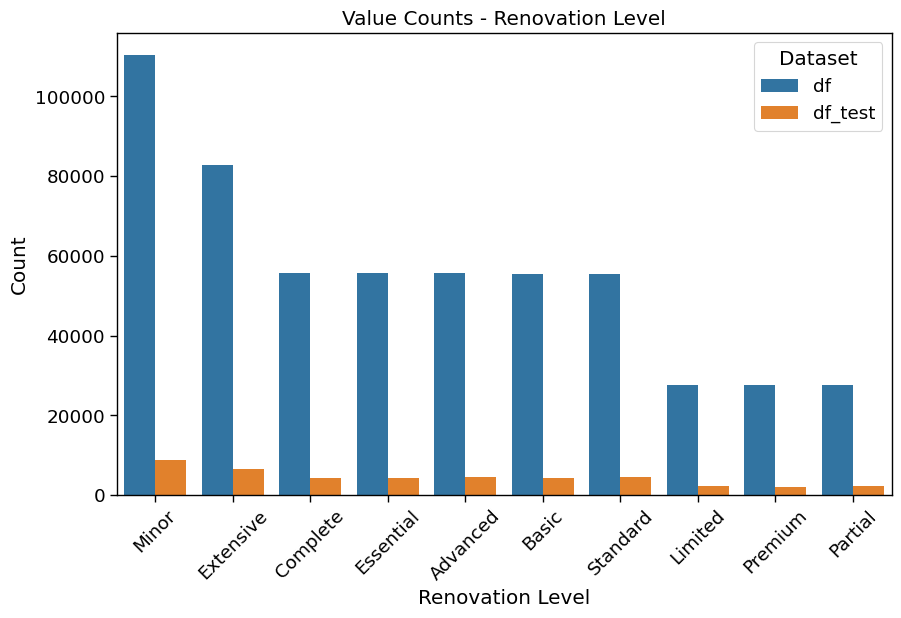

In [25]:
import seaborn as sns
import matplotlib.pyplot as plt

combined_df = pd.concat([df['renovation_level'].value_counts().rename('df'),
                         df_test['renovation_level'].value_counts().rename('df_test')],
                        axis=1)

melted_df = pd.melt(combined_df.reset_index(), id_vars='index', var_name='Dataset', value_name='Count')

# Plot using Seaborn
plt.figure(figsize=(10, 6))
sns.barplot(x='index', y='Count', hue='Dataset', data=melted_df)
plt.title('Value Counts - Renovation Level')
plt.xlabel('Renovation Level')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()


In [26]:
df['Address'].value_counts()

33 NORTH WATER ST    54
POCONO POINT RD      39
71 AIKEN ST          32
WEST KENOSIA AV      30
50 AIKEN ST          19
                     ..
7 MARBLE LANE         1
3 CRAIGMORE RD        1
444 VALLEY ROAD       1
26 SEA BREEZE AVE     1
154 GAYMOOR DRIVE     1
Name: Address, Length: 441774, dtype: int64

In [27]:
df['Year'].value_counts()

2022    57762
2021    48348
2017    44940
2019    44607
2018    43681
2020    43084
2009    40955
2016    38112
2012    35715
2015    34223
2011    33457
2010    30749
2014    29427
2013    28892
Name: Year, dtype: int64

In [28]:
df_test['Year'].value_counts()

2023    43954
Name: Year, dtype: int64

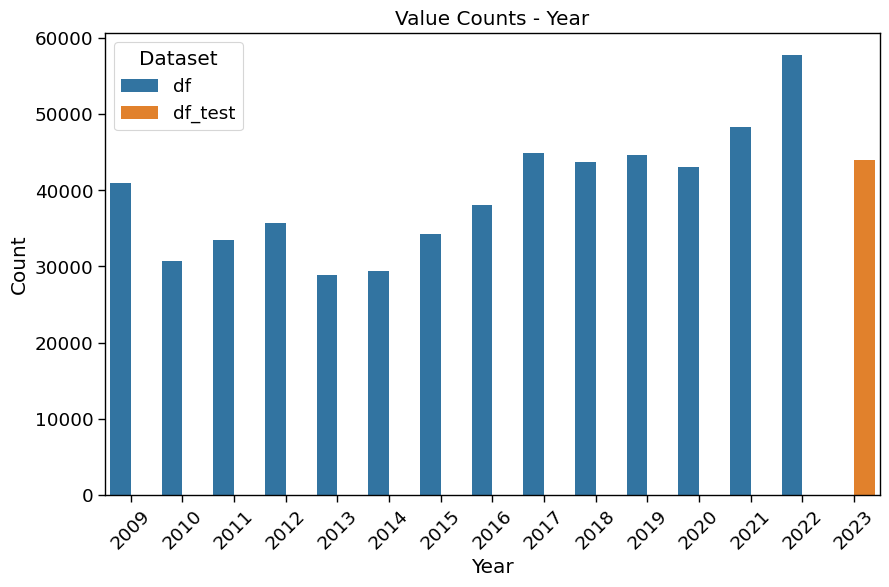

In [29]:
import seaborn as sns
import matplotlib.pyplot as plt

combined_df = pd.concat([df['Year'].value_counts().rename('df'),
                         df_test['Year'].value_counts().rename('df_test')],
                        axis=1)

melted_df = pd.melt(combined_df.reset_index(), id_vars='index', var_name='Dataset', value_name='Count')

# Plot using Seaborn
plt.figure(figsize=(10, 6))
sns.barplot(x='index', y='Count', hue='Dataset', data=melted_df)
plt.title('Value Counts - Year')
plt.xlabel('Year')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()


In [30]:
df['num_rooms'].value_counts()

Three rooms    406463
Two rooms      106103
Four rooms      26587
Six rooms       12625
Eight rooms      2174
Name: num_rooms, dtype: int64

In [31]:
df_test['num_rooms'].value_counts()

Three rooms    30969
Two rooms       9238
Four rooms      2414
Six rooms       1125
Eight rooms      208
Name: num_rooms, dtype: int64

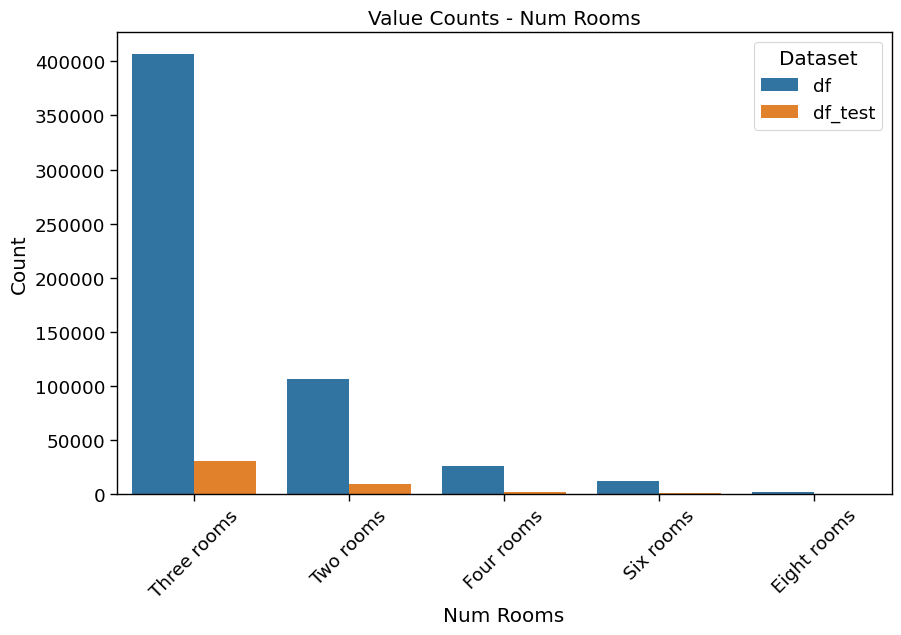

In [32]:
combined_df = pd.concat([df['num_rooms'].value_counts().rename('df'),
                         df_test['num_rooms'].value_counts().rename('df_test')],
                        axis=1)

melted_df = pd.melt(combined_df.reset_index(), id_vars='index', var_name='Dataset', value_name='Count')

plt.figure(figsize=(10, 6))
sns.barplot(x='index', y='Count', hue='Dataset', data=melted_df)
plt.title('Value Counts - Num Rooms')
plt.xlabel('Num Rooms')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()


In [33]:
df_test['num_rooms'].unique()

array(['Three rooms', 'Four rooms', 'Two rooms', 'Six rooms',
       'Eight rooms'], dtype=object)

In [34]:
def Encoding(text):
    d = {'Three rooms':3, 'Four rooms':4, 'Two rooms':2, 'Six rooms':6,
       'Eight rooms':8}
    return d[text]

In [35]:
df['num_rooms']= df['num_rooms'].apply(Encoding)
df_test['num_rooms'] = df_test['num_rooms'].apply(Encoding)
df['num_rooms']

0         2
1         3
2         3
3         3
4         3
         ..
553947    3
553948    3
553949    3
553950    3
553951    3
Name: num_rooms, Length: 553952, dtype: int64

In [36]:
df_test['num_rooms']

0        3
1        3
2        3
3        4
4        3
        ..
43949    3
43950    3
43951    3
43952    3
43953    3
Name: num_rooms, Length: 43954, dtype: int64

In [37]:
df['Property'].value_counts()

Single Family    394028
Condo            102981
Two Family        25800
Residential       16774
Three Family      12255
Four Family        2114
Name: Property, dtype: int64

In [38]:
df_test['Property'].value_counts()

Residential    43954
Name: Property, dtype: int64

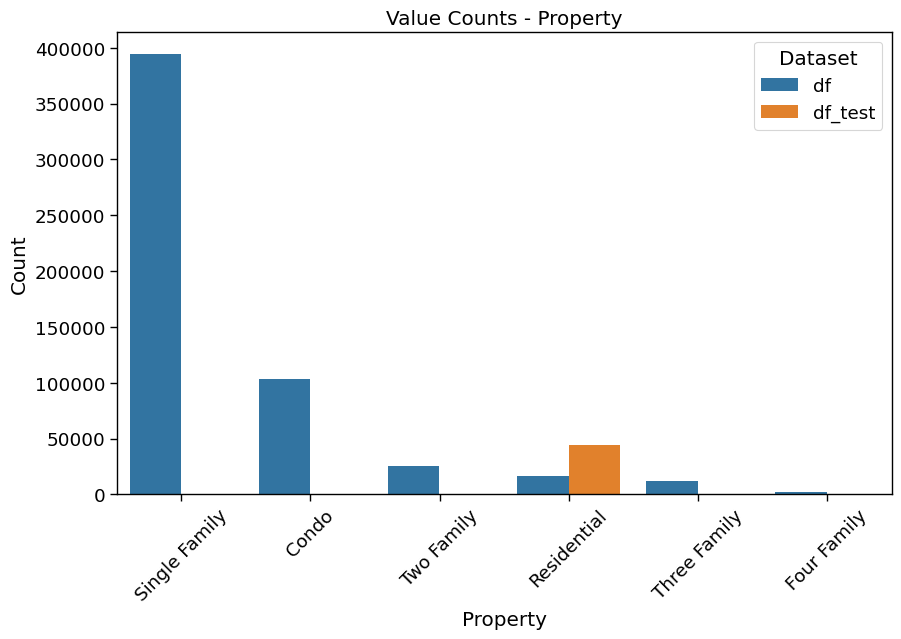

In [39]:
import seaborn as sns
import matplotlib.pyplot as plt

combined_df = pd.concat([df['Property'].value_counts().rename('df'),
                         df_test['Property'].value_counts().rename('df_test')],
                        axis=1)

melted_df = pd.melt(combined_df.reset_index(), id_vars='index', var_name='Dataset', value_name='Count')

plt.figure(figsize=(10, 6))
sns.barplot(x='index', y='Count', hue='Dataset', data=melted_df)
plt.title('Value Counts - Property')
plt.xlabel('Property')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()


In [40]:
df['Property'].unique()

array(['Condo', 'Single Family', 'Three Family', 'Two Family',
       'Four Family', 'Residential'], dtype=object)

In [41]:
def Encoding(text):
    d = {'Single Family':1, 'Two Family':2, 'Three Family':3, 'Four Family':4,
       'Condo':8,'Residential':5}
    return d[text]

In [42]:
df['Property']= df['Property'].apply(Encoding)
df_test['Property'] = df_test['Property'].apply(Encoding)
df['Property']

0         8
1         1
2         1
3         1
4         1
         ..
553947    5
553948    5
553949    5
553950    5
553951    5
Name: Property, Length: 553952, dtype: int64

In [43]:
df['amenities_rating'].value_counts()

Outstanding      110984
Superb            83032
Luxurious         55648
Satisfactory      55522
Mediocre          55223
Exceptional       55178
Marginal          55130
Unimpressive      27803
Commonplace       27790
Below Average     27642
Name: amenities_rating, dtype: int64

In [44]:
df_test['amenities_rating'].value_counts()

Outstanding      8821
Superb           6507
Exceptional      4447
Luxurious        4422
Marginal         4387
Satisfactory     4379
Mediocre         4375
Commonplace      2300
Below Average    2220
Unimpressive     2096
Name: amenities_rating, dtype: int64

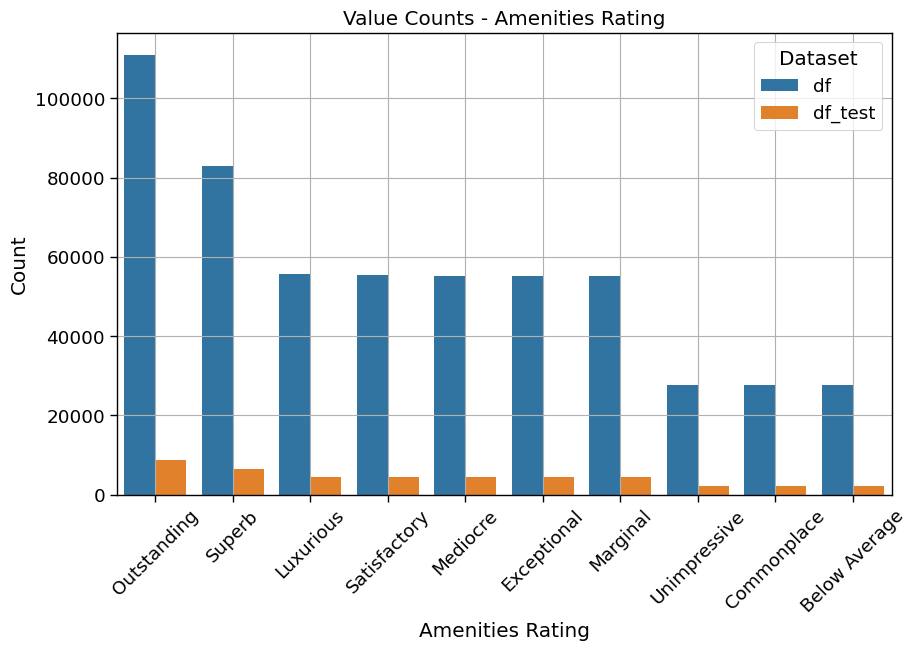

In [46]:
combined_df = pd.concat([df['amenities_rating'].value_counts().rename('df'),
                         df_test['amenities_rating'].value_counts().rename('df_test')],
                        axis=1)

melted_df = pd.melt(combined_df.reset_index(), id_vars='index', var_name='Dataset', value_name='Count')

plt.figure(figsize=(10, 6))
sns.barplot(x='index', y='Count', hue='Dataset', data=melted_df)
plt.title('Value Counts - Amenities Rating')
plt.xlabel('Amenities Rating')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()


In [47]:
non_numeric_values = find_non_numeric_values(df['carpet_area'].to_list())
np.unique(non_numeric_values)

array(['Not Provided'], dtype='<U12')

In [48]:
non_numeric_values = find_non_numeric_values(df_test['carpet_area'].to_list())
np.unique(non_numeric_values)

array(['Not Provided'], dtype='<U12')

In [49]:
df['carpet_area'] = np.where(df['carpet_area'] == 'Not Provided', np.nan, df['carpet_area'])
df['carpet_area'] = df['carpet_area'].astype(float)
df['carpet_area'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 553952 entries, 0 to 553951
Series name: carpet_area
Non-Null Count   Dtype  
--------------   -----  
548548 non-null  float64
dtypes: float64(1)
memory usage: 4.2 MB


In [50]:
df_test['carpet_area'] = np.where(df_test['carpet_area'] == 'Not Provided', np.nan, df_test['carpet_area'])

df_test['carpet_area'] = df_test['carpet_area'].astype(float)

df_test['carpet_area'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 43954 entries, 0 to 43953
Series name: carpet_area
Non-Null Count  Dtype  
--------------  -----  
43534 non-null  float64
dtypes: float64(1)
memory usage: 343.5 KB


In [51]:
df['nearby_restaurants'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 553952 entries, 0 to 553951
Series name: nearby_restaurants
Non-Null Count   Dtype  
--------------   -----  
553952 non-null  float64
dtypes: float64(1)
memory usage: 4.2 MB


In [52]:
df['public_transport_availability'].value_counts()

Scattered         110785
Abundant           83008
Inadequate         55584
Extensive          55572
Insufficient       55556
Accessible         55517
Well-connected     55103
Limited            27756
Sparse             27678
Patchy             27393
Name: public_transport_availability, dtype: int64

In [53]:
df_test['public_transport_availability'].value_counts()

Scattered         8738
Abundant          6613
Accessible        4553
Insufficient      4478
Inadequate        4376
Extensive         4338
Well-connected    4253
Patchy            2261
Sparse            2213
Limited           2131
Name: public_transport_availability, dtype: int64

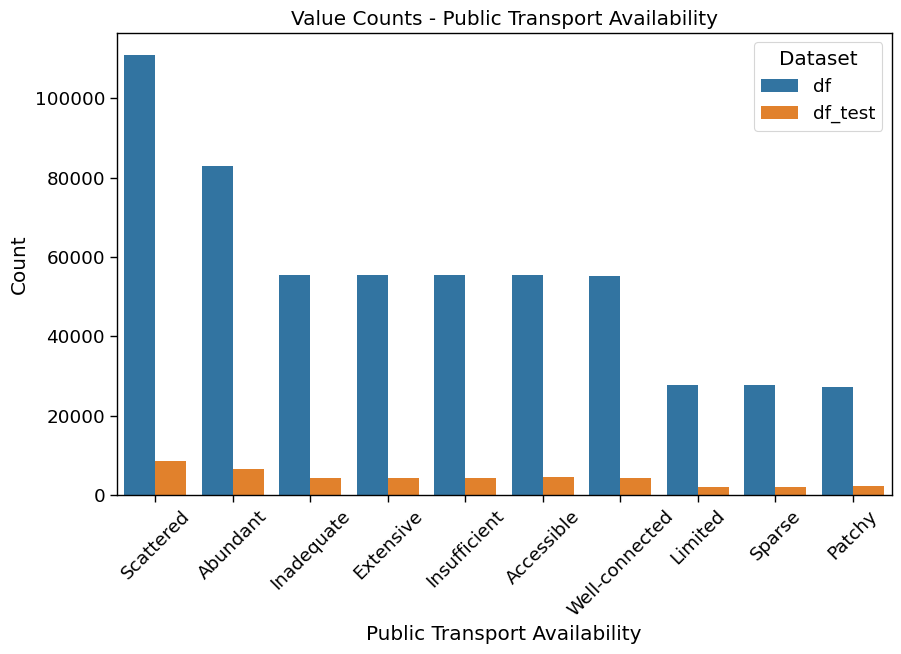

In [54]:
import seaborn as sns
import matplotlib.pyplot as plt

combined_df = pd.concat([df['public_transport_availability'].value_counts().rename('df'),
                         df_test['public_transport_availability'].value_counts().rename('df_test')],
                        axis=1)

melted_df = pd.melt(combined_df.reset_index(), id_vars='index', var_name='Dataset', value_name='Count')

plt.figure(figsize=(10, 6))
sns.barplot(x='index', y='Count', hue='Dataset', data=melted_df)
plt.title('Value Counts - Public Transport Availability')
plt.xlabel('Public Transport Availability')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()


In [55]:
non_numeric_values = find_non_numeric_values(df['property_tax_rate'].to_list())
np.unique(non_numeric_values)

array(['Not Provided'], dtype='<U12')

In [56]:
non_numeric_values = find_non_numeric_values(df_test['property_tax_rate'].to_list())
np.unique(non_numeric_values)

array(['Not Provided'], dtype='<U12')

In [57]:
df['property_tax_rate'] = np.where(df['property_tax_rate'] == 'Not Provided', np.nan, df['property_tax_rate'])
df['property_tax_rate'] = df['property_tax_rate'].astype(float)
df['property_tax_rate'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 553952 entries, 0 to 553951
Series name: property_tax_rate
Non-Null Count   Dtype  
--------------   -----  
542722 non-null  float64
dtypes: float64(1)
memory usage: 4.2 MB


In [58]:
df_test['property_tax_rate'] = np.where(df_test['property_tax_rate'] == 'Not Provided', np.nan, df_test['property_tax_rate'])
df_test['property_tax_rate'] = df_test['property_tax_rate'].astype(float)
df_test['property_tax_rate'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 43954 entries, 0 to 43953
Series name: property_tax_rate
Non-Null Count  Dtype  
--------------  -----  
43077 non-null  float64
dtypes: float64(1)
memory usage: 343.5 KB


In [59]:
df['distance_to_school'].info()
df_test['distance_to_school'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 553952 entries, 0 to 553951
Series name: distance_to_school
Non-Null Count   Dtype  
--------------   -----  
553952 non-null  float64
dtypes: float64(1)
memory usage: 4.2 MB
<class 'pandas.core.series.Series'>
RangeIndex: 43954 entries, 0 to 43953
Series name: distance_to_school
Non-Null Count  Dtype  
--------------  -----  
43954 non-null  float64
dtypes: float64(1)
memory usage: 343.5 KB


In [60]:
df['Locality'].unique()

array(['Greenwich', 'East Hampton', 'Ridgefield', 'Old Lyme', 'Naugatuck',
       'Killingly', 'Glastonbury', 'Bridgeport', 'Danbury', 'Hamden',
       'Branford', 'Norwalk', 'East Granby', 'Windsor', 'Oxford',
       'Chester', 'Thompson', 'Eastford', 'Newington', 'Harwinton',
       'Canterbury', 'West Haven', 'Waterbury', 'Bristol', 'Bloomfield',
       'Plainfield', 'Wallingford', 'Farmington', 'Berlin', 'Ellington',
       'Stratford', 'Woodstock', 'Fairfield', 'New Britain', 'Waterford',
       'Redding', 'Stonington', 'Derby', 'Sprague', 'East Haddam',
       'Cromwell', 'New Milford', 'Southington', 'Wethersfield',
       'South Windsor', 'New London', 'Windham', 'Trumbull', 'Newtown',
       'Winchester', 'Durham', 'Wilton', 'Middletown', 'Putnam',
       'Windsor Locks', 'Preston', 'Suffield', 'Roxbury', 'Granby',
       'Marlborough', 'Tolland', 'Simsbury', 'Avon', 'Essex', 'Darien',
       'Madison', 'Sterling', 'Haddam', 'Somers', 'Cheshire',
       'Torrington', 'Rocky Hi

In [61]:
df_test['Locality'].unique()

array(['Old Lyme', 'Ridgefield', 'Cromwell', 'New Haven', 'Beacon Falls',
       'Derby', 'West Hartford', 'Wolcott', 'Guilford', 'Goshen',
       'Granby', 'Plainfield', 'Stonington', 'Branford', 'Manchester',
       'Bristol', 'Berlin', 'Naugatuck', 'New Fairfield', 'Kent',
       'Rocky Hill', 'Enfield', 'Milford', 'Stamford', 'Thomaston',
       'Old Saybrook', 'Norwalk', 'Greenwich', 'Sharon', 'East Lyme',
       'New Britain', 'Middletown', 'Norwich', 'Trumbull', 'Farmington',
       'Wethersfield', 'Hartford', 'Torrington', 'East Hartford',
       'Windsor', 'Bethel', 'Avon', 'Mansfield', 'North Haven',
       'Bloomfield', 'Plymouth', 'Weston', 'Bethany', 'Meriden',
       'Killingworth', 'Colchester', 'Hebron', 'Darien', 'South Windsor',
       'Winchester', 'Glastonbury', 'Brookfield', 'East Windsor',
       'Waterbury', 'Thompson', 'Easton', 'New Canaan', 'Sprague',
       'Watertown', 'Burlington', 'Stratford', 'Redding', 'Woodbury',
       'Monroe', 'Putnam', 'Lyme', 'Bark

In [62]:
np.where(df['Locality']=='***Unknown***')

(array([39859]),)

In [63]:
np.where(df_test['Locality']=='***Unknown***')

(array([], dtype=int64),)

In [64]:
df['Locality'].nunique()

170

In [65]:
df_test['Locality'].nunique()


139

In [66]:
df['Residential'].value_counts()

Detached House    406463
Condominium       106103
Duplex             26587
Triplex            12625
Fourplex            2174
Name: Residential, dtype: int64

In [67]:
df_test['Residential'].value_counts()

Detached House    30969
Condominium        9238
Duplex             2414
Triplex            1125
Fourplex            208
Name: Residential, dtype: int64

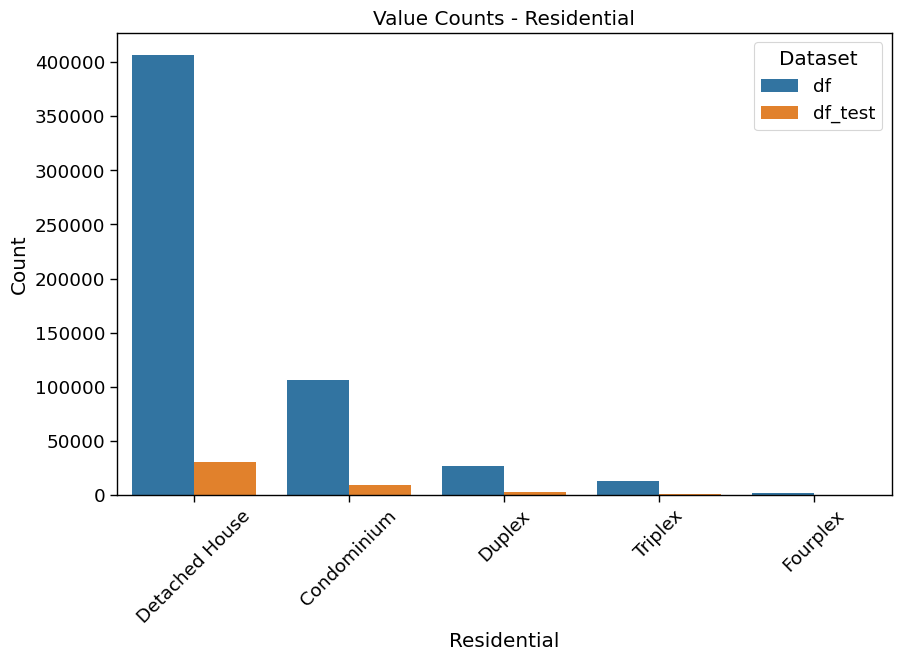

In [68]:
import seaborn as sns
import matplotlib.pyplot as plt

combined_df = pd.concat([df['Residential'].value_counts().rename('df'),
                         df_test['Residential'].value_counts().rename('df_test')],
                        axis=1)

melted_df = pd.melt(combined_df.reset_index(), id_vars='index', var_name='Dataset', value_name='Count')

plt.figure(figsize=(10, 6))
sns.barplot(x='index', y='Count', hue='Dataset', data=melted_df)
plt.title('Value Counts - Residential')
plt.xlabel('Residential')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()


In [69]:
df_test['Estimated Value'].describe()

count    4.395400e+04
mean     3.423068e+05
std      2.677833e+06
min      1.000000e+02
25%      1.059625e+05
50%      1.599300e+05
75%      2.660150e+05
max      3.367660e+08
Name: Estimated Value, dtype: float64

In [70]:
df['Sale Price'].describe()

count    5.539520e+05
mean     3.514670e+05
std      6.708937e+05
min      0.000000e+00
25%      1.480000e+05
50%      2.300000e+05
75%      3.647000e+05
max      1.570000e+08
Name: Sale Price, dtype: float64

In [71]:
df['specifications']

0         In 2009, this condo located in Greenwich at 40...
1         In 2009, this single family located in East Ha...
2         In 2009, this single family located in Ridgefi...
3         In 2009, this single family located in Old Lym...
4         In 2009, this single family located in Naugatu...
                                ...                        
553947    In 2022, this residential located in Enfield a...
553948    In 2022, this residential located in Naugatuck...
553949    In 2022, this residential located in South Win...
553950    In 2022, this residential located in Bloomfiel...
553951    In 2022, this residential located in Stamford ...
Name: specifications, Length: 553952, dtype: object

In [72]:
df_test['specifications']

0        In 2023, this residential located in Old Lyme ...
1        In 2023, this residential located in Ridgefiel...
2        In 2023, this residential located in Cromwell ...
3        In 2023, this residential located in New Haven...
4        In 2023, this residential located in Beacon Fa...
                               ...                        
43949    In 2023, this residential located in Ansonia a...
43950    In 2023, this residential located in Enfield a...
43951    In 2023, this residential located in Simsbury ...
43952    In 2023, this residential located in Essex at ...
43953    In 2023, this residential located in Milford a...
Name: specifications, Length: 43954, dtype: object

> we have noticed that specification column has all previous values that are already given in values.

In [73]:
df_test['property_tax_rate'].unique()

array([1.46      ,        nan, 5.24759326])

In [74]:
np.where(df_test['property_tax_rate']==np.nan)

(array([], dtype=int64),)

In [75]:
np.where(df_test['property_tax_rate']==1.46)

(array([    0,     1,     2, ..., 43951, 43952, 43953]),)

# Exploratory Data Analysis (EDA)

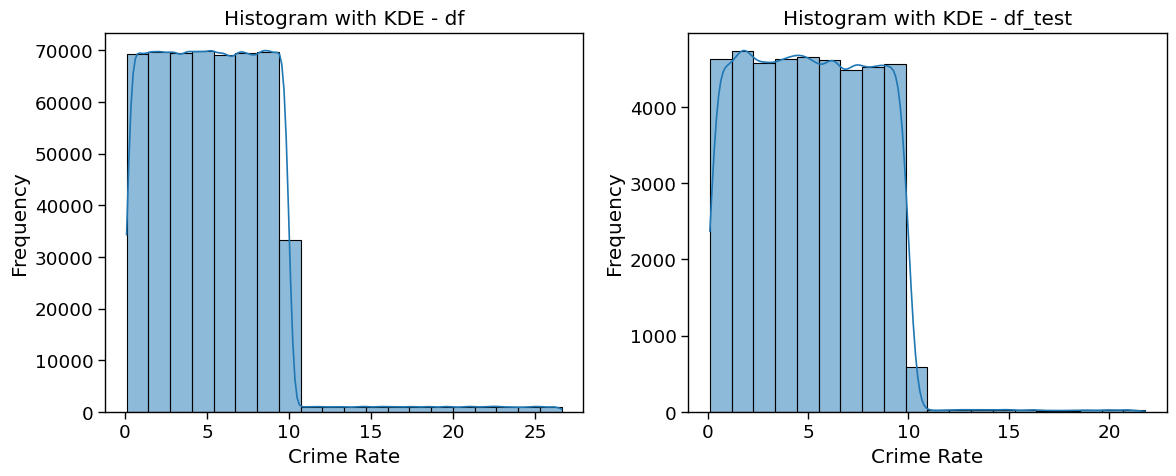

In [76]:
import seaborn as sns
import matplotlib.pyplot as plt

fig, axes = plt.subplots(1, 2, figsize=(12, 5))

sns.histplot(df['crime_rate'], kde=True, ax=axes[0],bins=20)
axes[0].set_title('Histogram with KDE - df')
axes[0].set_xlabel('Crime Rate')
axes[0].set_ylabel('Frequency')

sns.histplot(df_test['crime_rate'],bins=20, kde=True, ax=axes[1])
axes[1].set_title('Histogram with KDE - df_test')
axes[1].set_xlabel('Crime Rate')
axes[1].set_ylabel('Frequency')

plt.tight_layout()
plt.show()


# Detecting Outliers

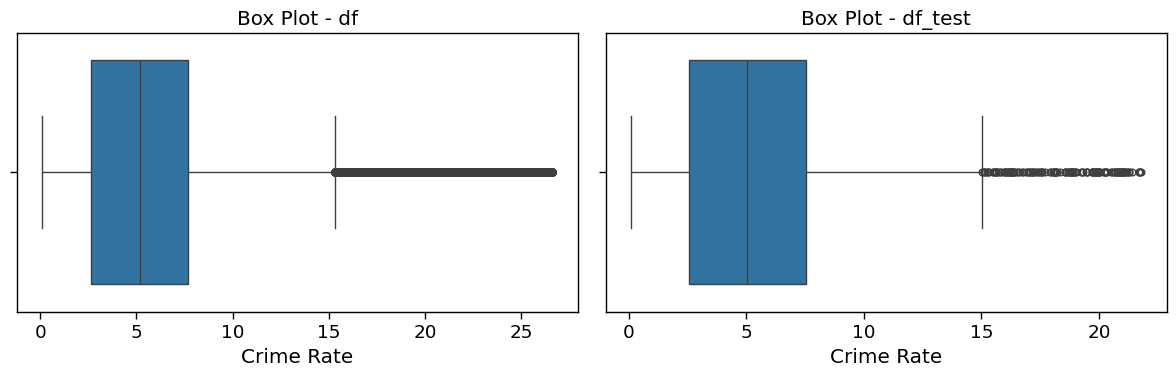

In [77]:
df_reset = df.reset_index(drop=True)
df_test_reset = df_test.reset_index(drop=True)
fig, axes = plt.subplots(1, 2, figsize=(12, 4))
sns.boxplot(x=df_reset['crime_rate'], ax=axes[0])
axes[0].set_title('Box Plot - df')
axes[0].set_xlabel('Crime Rate')

sns.boxplot(x=df_test_reset['crime_rate'], ax=axes[1])
axes[1].set_title('Box Plot - df_test')
axes[1].set_xlabel('Crime Rate')

plt.tight_layout()
plt.show()


In [78]:
iqr = df['crime_rate'].quantile(0.75) - df['crime_rate'].quantile(0.25)
upper_limit= df['crime_rate'].quantile(0.75) + iqr *1.5
df[df['crime_rate']>upper_limit].shape[0]/df.shape[0]*100

1.5250418808849864

In [79]:
iqr = df_test['crime_rate'].quantile(0.75) - df_test['crime_rate'].quantile(0.25)
upper_limit= df_test['crime_rate'].quantile(0.75) + iqr *1.5
df_test[df_test['crime_rate']>upper_limit].shape[0]/df_test.shape[0]*100

0.30941438776903124

> - There are Outliers in Crime Rate Column  Which Is 1.5% of the training data  and 0.3 % of the testing data

In [80]:
df['crime_rate']= np.where(df['crime_rate'] >upper_limit,upper_limit,df['crime_rate'])
df_test['crime_rate']= np.where(df_test['crime_rate'] >upper_limit,upper_limit,df_test['crime_rate'])

### After Removal of Outliers

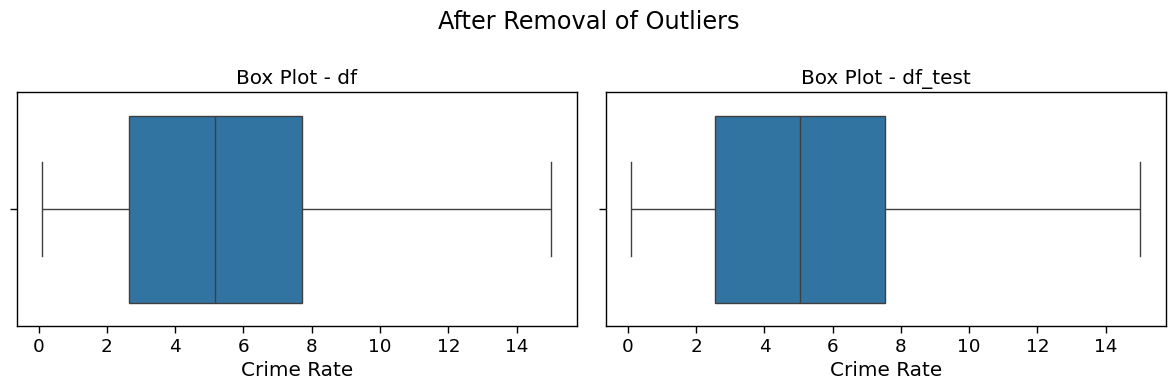

In [81]:
df_reset = df.reset_index(drop=True)
df_test_reset = df_test.reset_index(drop=True)
fig, axes = plt.subplots(1, 2, figsize=(12, 4))
sns.boxplot(x=df_reset['crime_rate'], ax=axes[0])
axes[0].set_title('Box Plot - df')
axes[0].set_xlabel('Crime Rate')

sns.boxplot(x=df_test_reset['crime_rate'], ax=axes[1])
axes[1].set_title('Box Plot - df_test')
axes[1].set_xlabel('Crime Rate')
plt.suptitle("After Removal of Outliers")
plt.tight_layout()
plt.show()


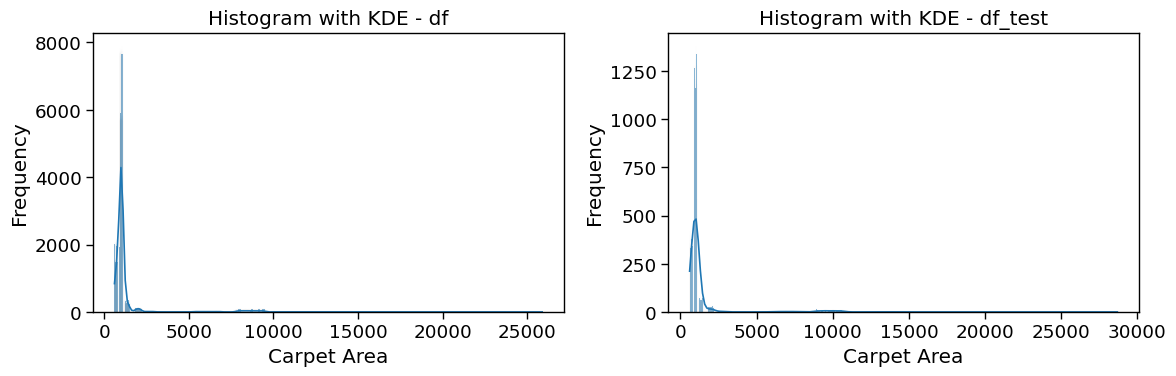

In [82]:
import seaborn as sns
import matplotlib.pyplot as plt

fig, axes = plt.subplots(1, 2, figsize=(12, 4))

sns.histplot(df['carpet_area'], kde=True, ax=axes[0])
axes[0].set_title('Histogram with KDE - df')
axes[0].set_xlabel('Carpet Area')
axes[0].set_ylabel('Frequency')

sns.histplot(df_test['carpet_area'], kde=True, ax=axes[1])
axes[1].set_title('Histogram with KDE - df_test')
axes[1].set_xlabel('Carpet Area')
axes[1].set_ylabel('Frequency')

plt.tight_layout()
plt.show()


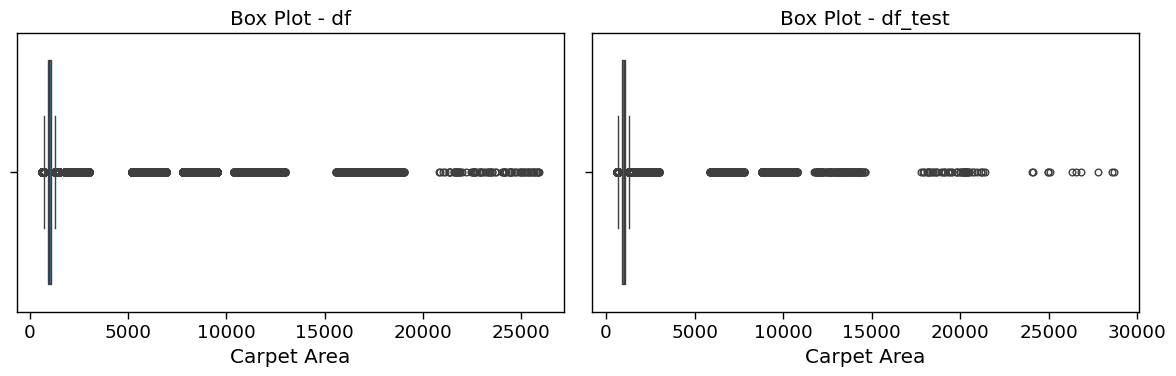

In [83]:
df_reset = df.reset_index(drop=True)
df_test_reset = df_test.reset_index(drop=True)
fig, axes = plt.subplots(1, 2, figsize=(12, 4))


sns.boxplot(x=df_reset['carpet_area'], ax=axes[0])
axes[0].set_title('Box Plot - df')
axes[0].set_xlabel('Carpet Area')

# Boxplot for df_test
sns.boxplot(x=df_test_reset['carpet_area'], ax=axes[1])
axes[1].set_title('Box Plot - df_test')
axes[1].set_xlabel('Carpet Area')

plt.tight_layout()
plt.show()


# Detecting Outliers

In [84]:
iqr = df['carpet_area'].quantile(0.75) - df['carpet_area'].quantile(0.25)
upper_limit= df['carpet_area'].quantile(0.75) + iqr *1.5
lower_limit= df['carpet_area'].quantile(0.75) - iqr *1.5
upper_limit,lower_limit

(1275.5, 846.5)

In [85]:
df[df['carpet_area']>upper_limit].shape[0]

55270

In [86]:
df[df['carpet_area']< lower_limit].shape[0]

100745

In [87]:
(df[df['carpet_area']>upper_limit].shape[0] + df[df['carpet_area']< lower_limit].shape[0]) /df.shape[0]*100

28.16399254809081

> 28 % of Data is Outlier.
> - If 28% Data is outlier it means it is not outlier

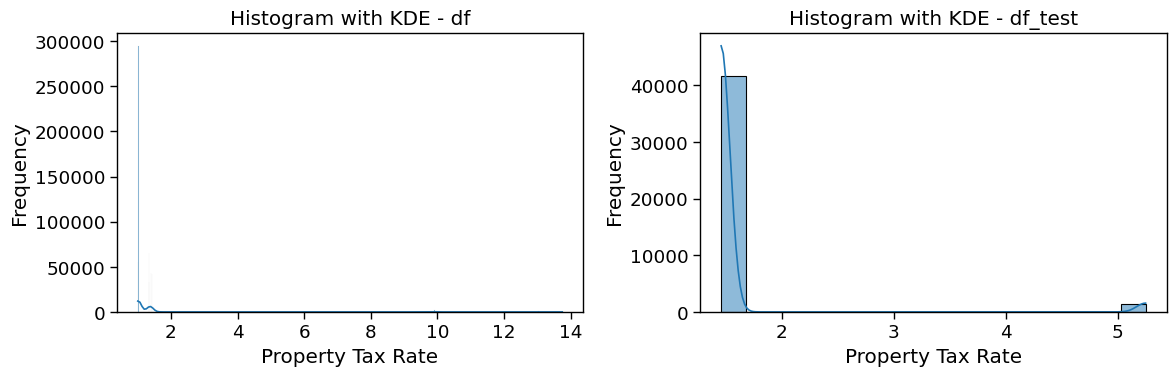

In [88]:
import seaborn as sns
import matplotlib.pyplot as plt

fig, axes = plt.subplots(1, 2, figsize=(12, 4))

sns.histplot(df['property_tax_rate'], kde=True, ax=axes[0])
axes[0].set_title('Histogram with KDE - df')
axes[0].set_xlabel('Property Tax Rate')
axes[0].set_ylabel('Frequency')

sns.histplot(df_test['property_tax_rate'], kde=True, ax=axes[1])
axes[1].set_title('Histogram with KDE - df_test')
axes[1].set_xlabel('Property Tax Rate')
axes[1].set_ylabel('Frequency')

plt.tight_layout()
plt.show()


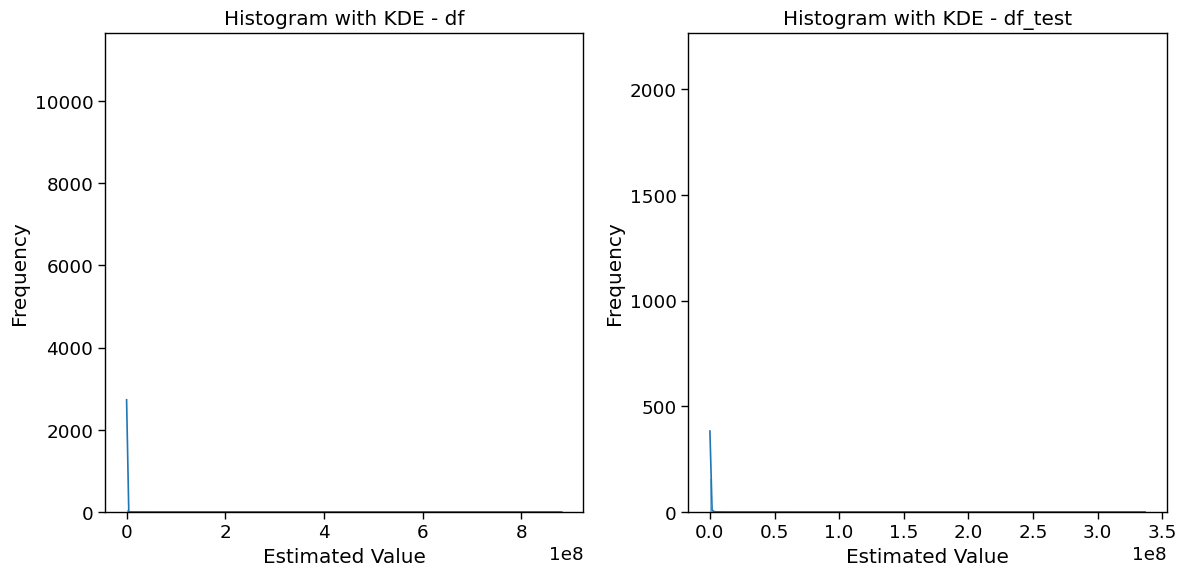

In [89]:
import seaborn as sns
import matplotlib.pyplot as plt

fig, axes = plt.subplots(1, 2, figsize=(12, 6))

sns.histplot(df['Estimated Value'], kde=True, ax=axes[0])
axes[0].set_title('Histogram with KDE - df')
axes[0].set_xlabel('Estimated Value')
axes[0].set_ylabel('Frequency')

sns.histplot(df_test['Estimated Value'], kde=True, ax=axes[1])
axes[1].set_title('Histogram with KDE - df_test')
axes[1].set_xlabel('Estimated Value')
axes[1].set_ylabel('Frequency')

plt.tight_layout()
plt.show()


In [ ]:
df.columns.shape

In [ ]:
df_test.columns

JBXSJXBANK

In [ ]:
df['Residential'].unique()

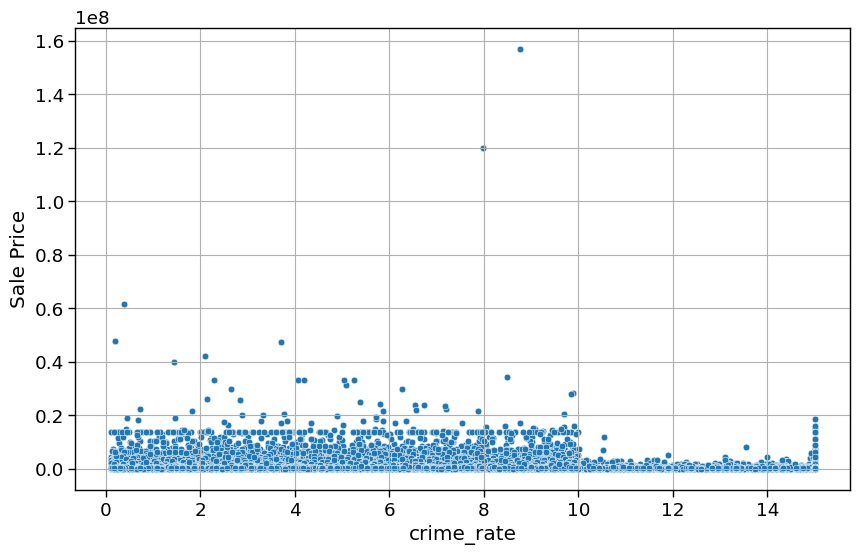

In [90]:
df_reset = df.reset_index(drop=True)

sns.scatterplot(x=df_reset['crime_rate'],y=df_reset['Sale Price'])
plt.grid(True);

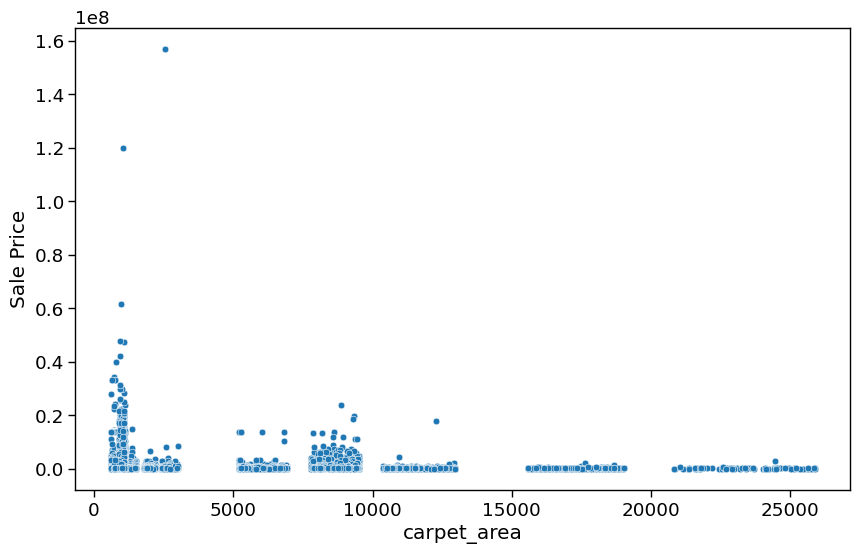

In [91]:
import pandas as pd
import seaborn as sns

# Assuming 'df' is your DataFrame
# Reset the index to avoid duplicate labels
df_reset = df.reset_index(drop=True)

# Now, you can use the 'df_reset' DataFrame for plotting
sns.scatterplot(x=df_reset['carpet_area'], y=df_reset['Sale Price']);

In [92]:
df = df[df['Sale Price']<0.7e8]

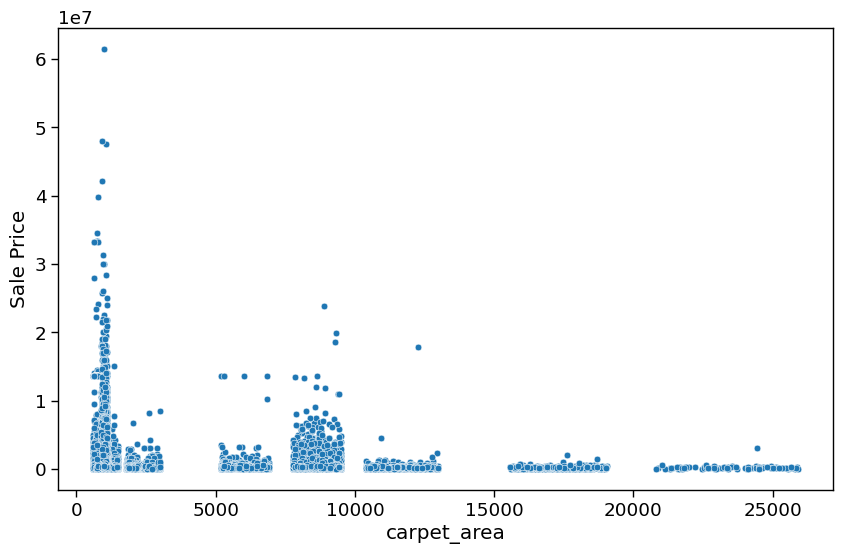

In [93]:
df_reset = df.reset_index(drop=True)

# Now, you can use the 'df_reset' DataFrame for plotting
sns.scatterplot(x=df_reset['carpet_area'], y=df_reset['Sale Price']);

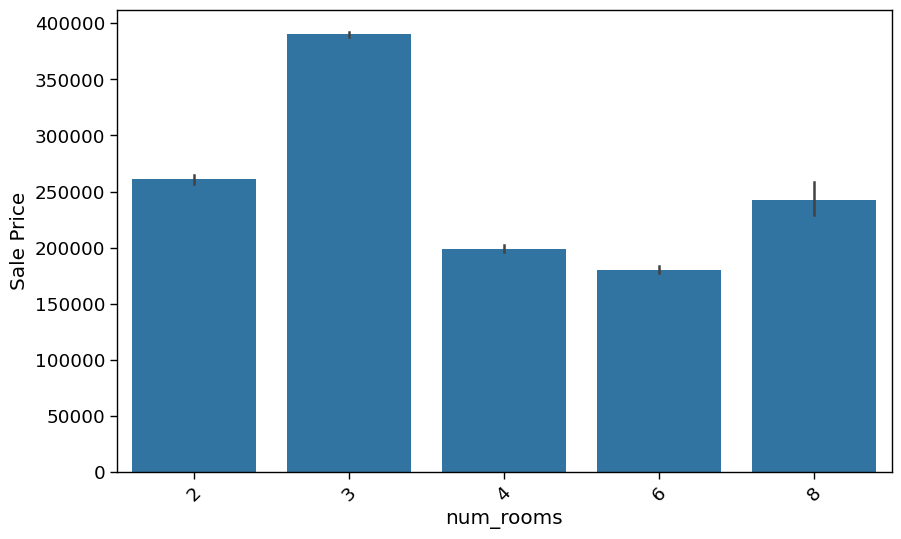

In [94]:
sns.barplot(x=df['num_rooms'],y=df['Sale Price'])
plt.xticks(rotation=45);

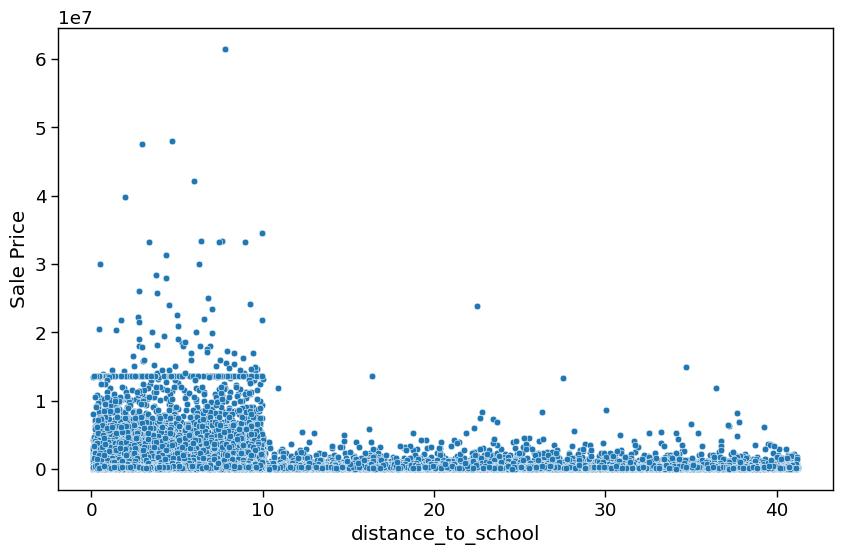

In [95]:
sns.scatterplot(x=df['distance_to_school'],y=df['Sale Price']);

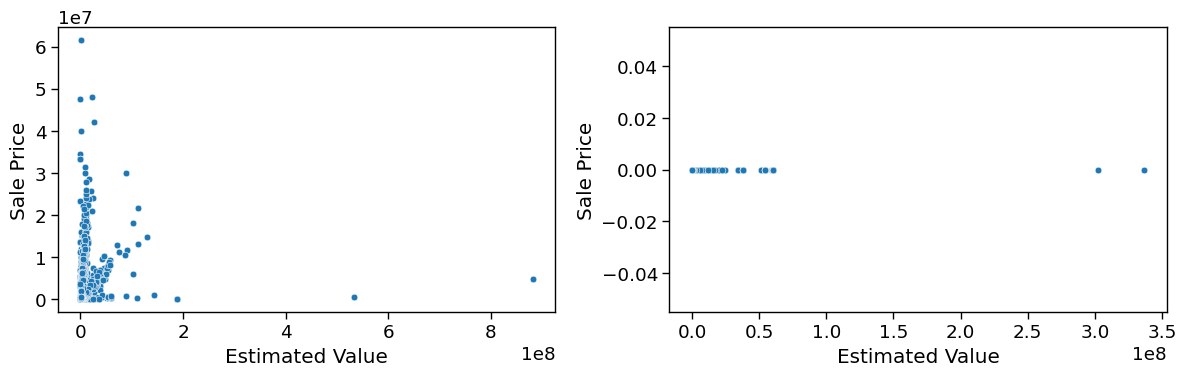

In [96]:

fig, axes = plt.subplots(1, 2, figsize=(12, 4))

sns.scatterplot(x=df['Estimated Value'],y=df['Sale Price'], ax=axes[0])

sns.scatterplot(x=df_test['Estimated Value'],y=df_test['Sale Price'], ax=axes[1])

plt.tight_layout()
plt.show()


In [97]:
df = df[df['Sale Price'] < 0.8e8]
df = df[df['Estimated Value'] < 2e8]

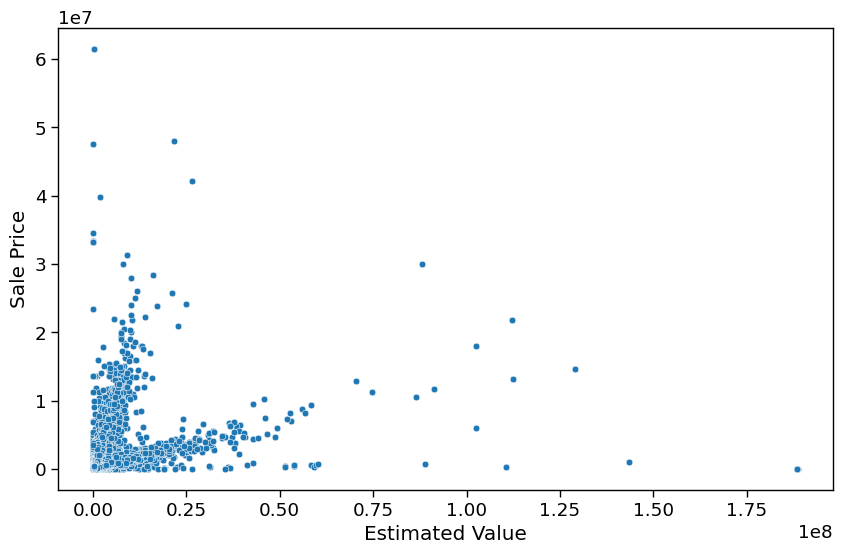

In [98]:
sns.scatterplot(x=df['Estimated Value'],y=df['Sale Price']);

In [99]:
df.columns

Index(['crime_rate', 'renovation_level', 'Year', 'Address', 'num_rooms',
       'Property', 'amenities_rating', 'carpet_area', 'nearby_restaurants',
       'public_transport_availability', 'property_tax_rate',
       'distance_to_school', 'Locality', 'Residential', 'Estimated Value',
       'Sale Price', 'specifications', 'month', 'day'],
      dtype='object')

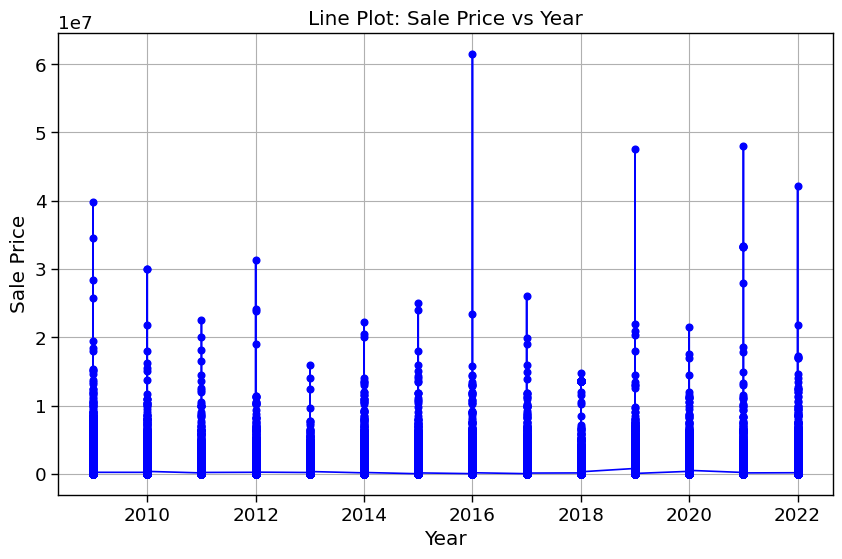

In [100]:
import matplotlib.pyplot as plt

# Assuming df is your DataFrame with columns 'Sale Price' and 'Year'
plt.figure(figsize=(10, 6))  # Adjust the figure size as needed

# Line plot between Sale Price and Year
plt.plot(df['Year'], df['Sale Price'], marker='o', linestyle='-', color='b')

# Set labels and title
plt.xlabel('Year')
plt.ylabel('Sale Price')
plt.title('Line Plot: Sale Price vs Year')

# Show the plot
plt.grid(True)
plt.show()


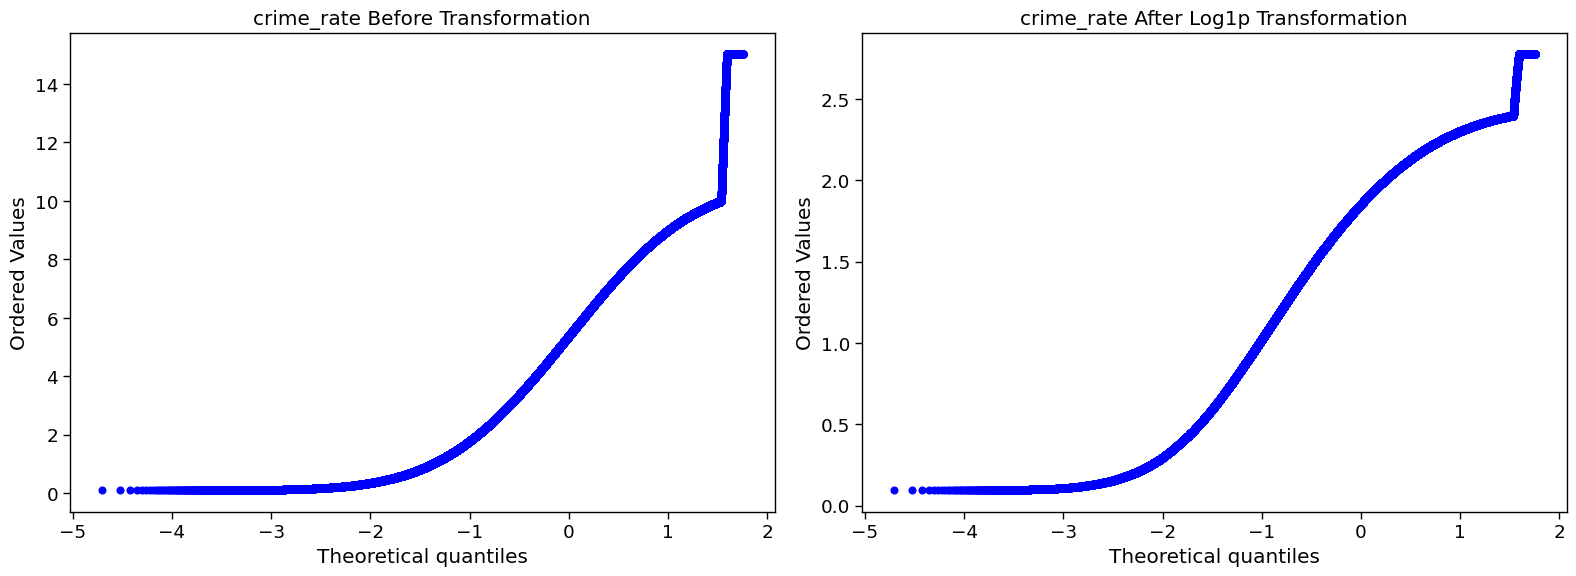

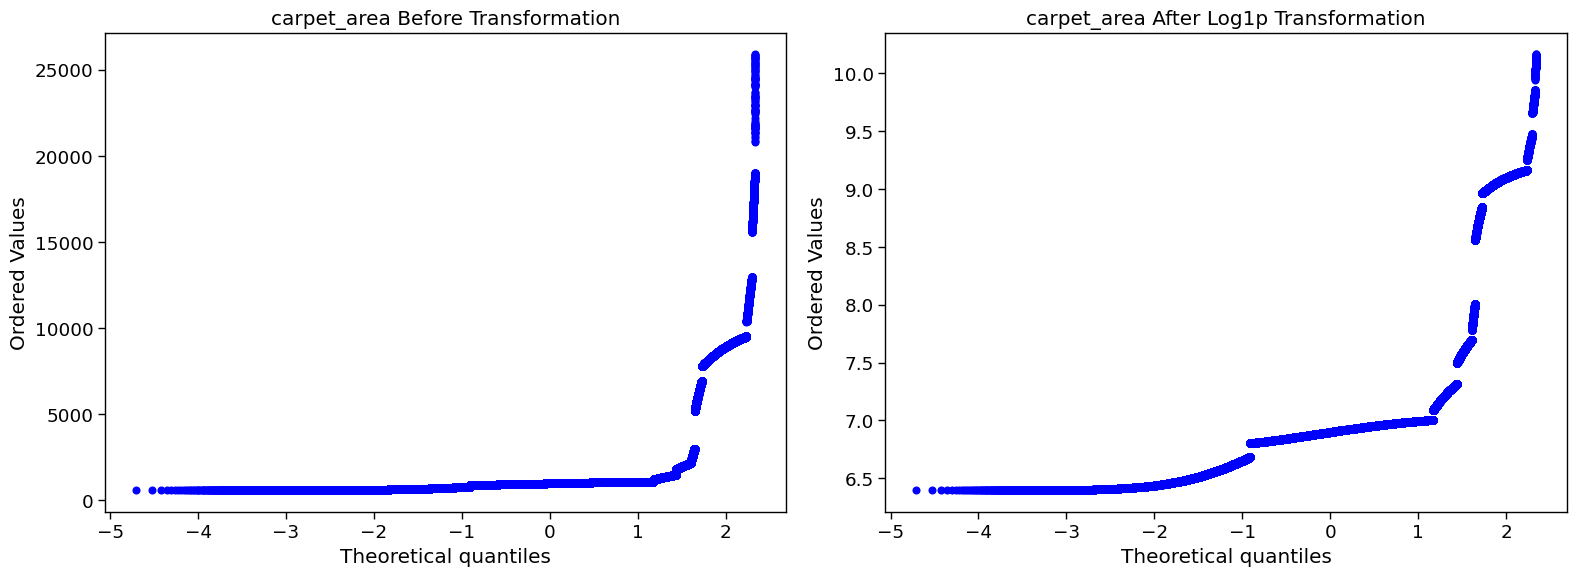

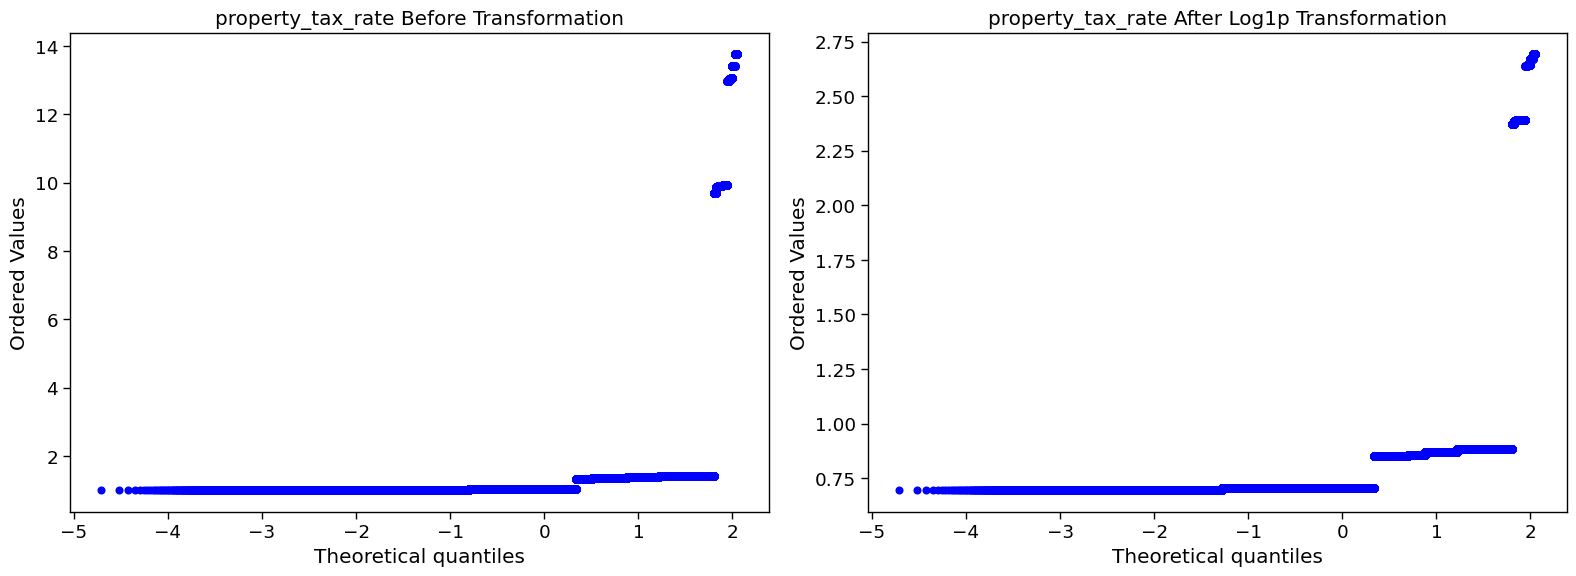

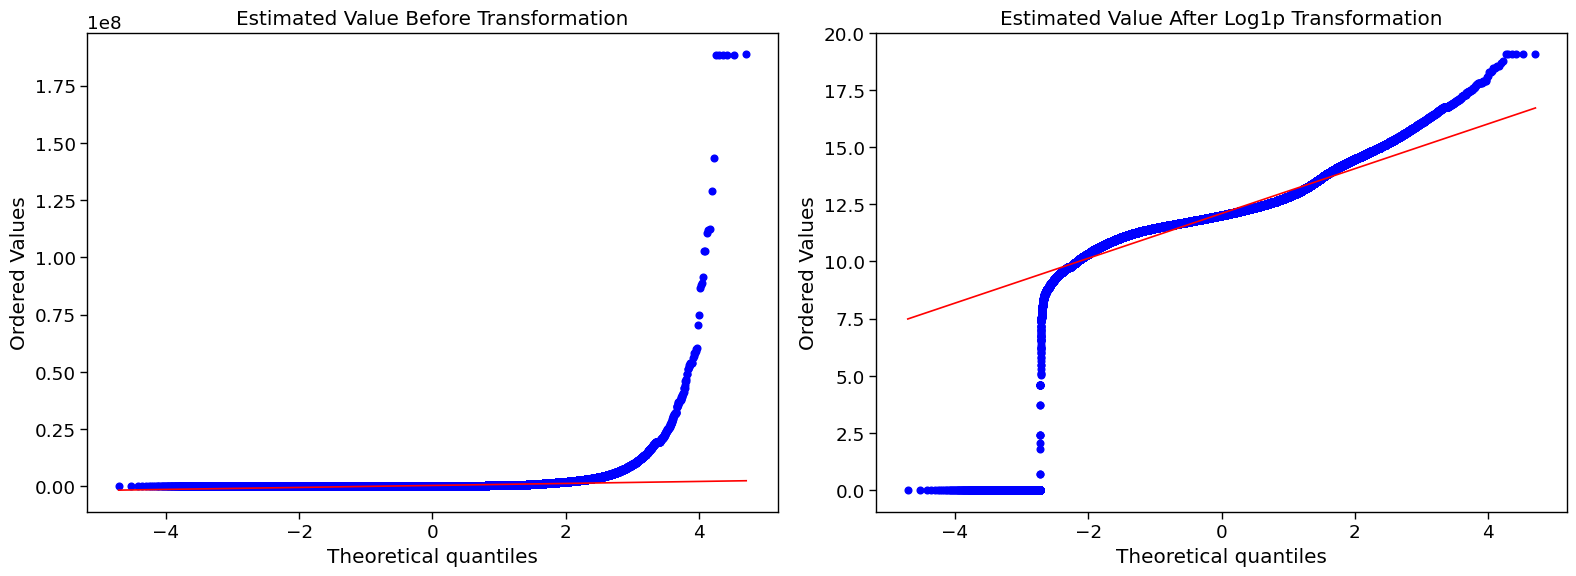

In [101]:
from copy import deepcopy

def log1p_transformation(val):
    return np.log1p(val)

import scipy.stats as stats
num_cols = ['crime_rate','carpet_area','property_tax_rate','Estimated Value']
temp_df = deepcopy (df[num_cols])
temp_df1 = deepcopy (df[num_cols])

for col in num_cols:
    # Original distribution plot
    plt.figure(figsize=(16, 6))
    plt.subplot(121)  # Adjusted subplot index
    stats.probplot(df[col], dist="norm", plot=plt)
    plt.title(f'{col} Before Transformation')

    # Log1p transformation plot
    temp_df1[col] = df[col].apply(log1p_transformation)
    plt.subplot(122)  # Adjusted subplot index
    stats.probplot(temp_df1[col], dist="norm", plot=plt)
    plt.title(f'{col} After Log1p Transformation')

    plt.tight_layout()
    plt.show()



In [102]:
df_test['num_rooms'].unique()

array([3, 4, 2, 6, 8])

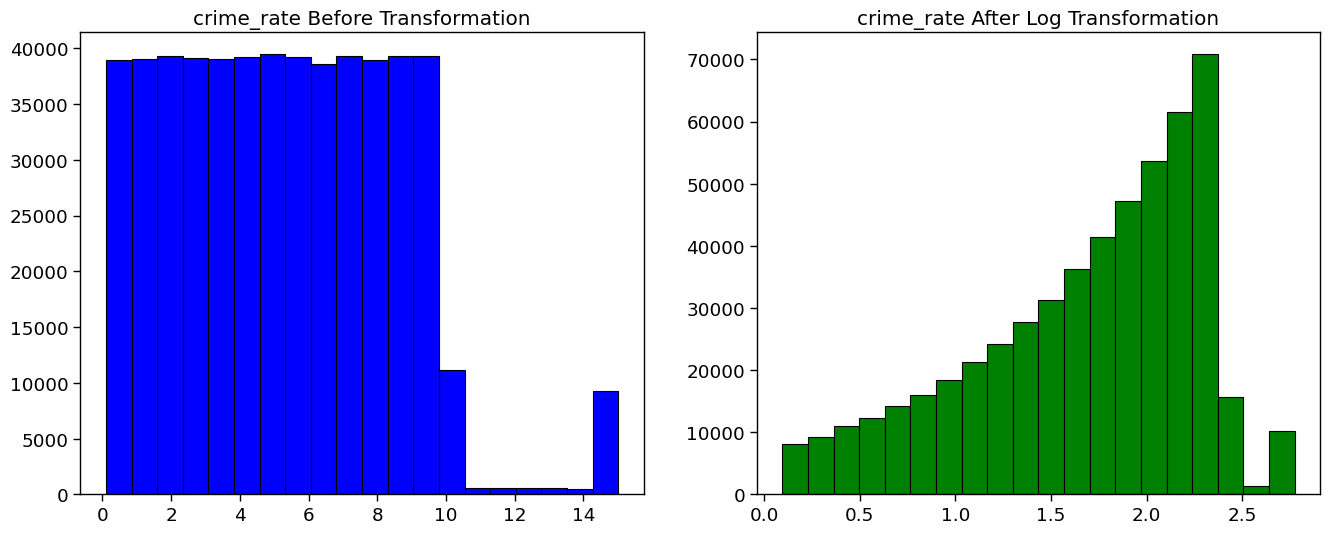

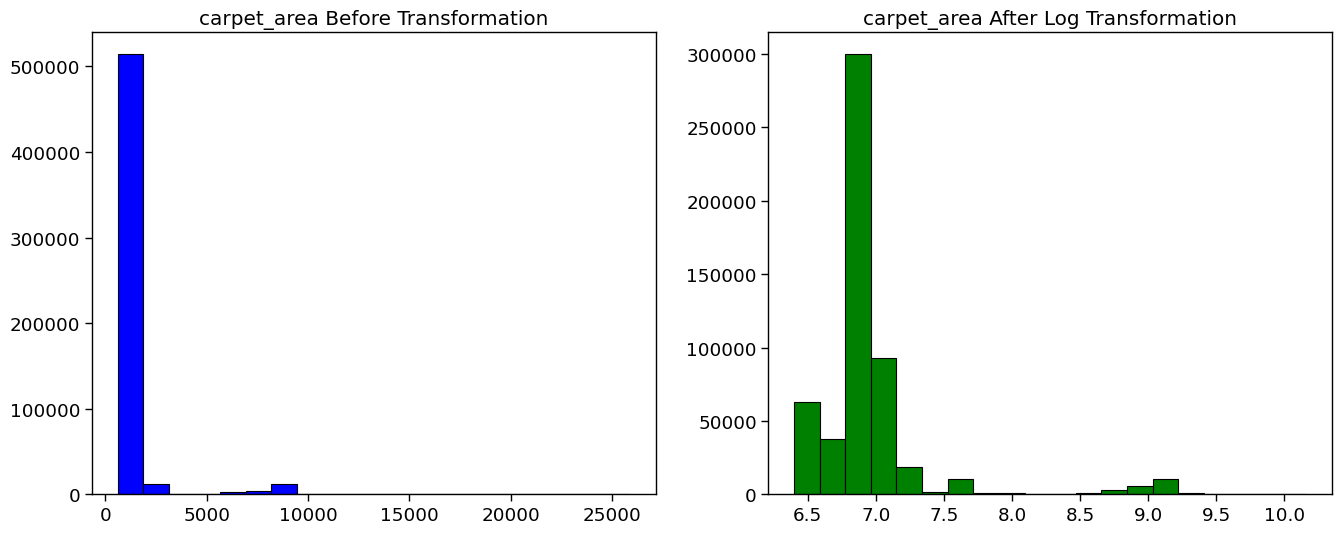

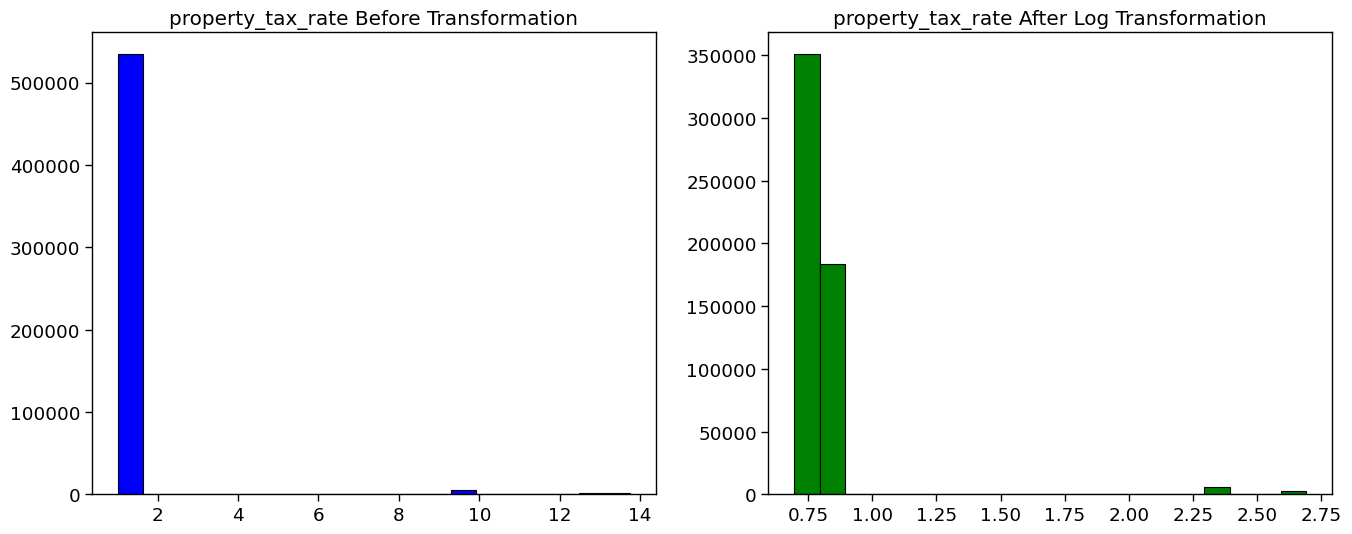

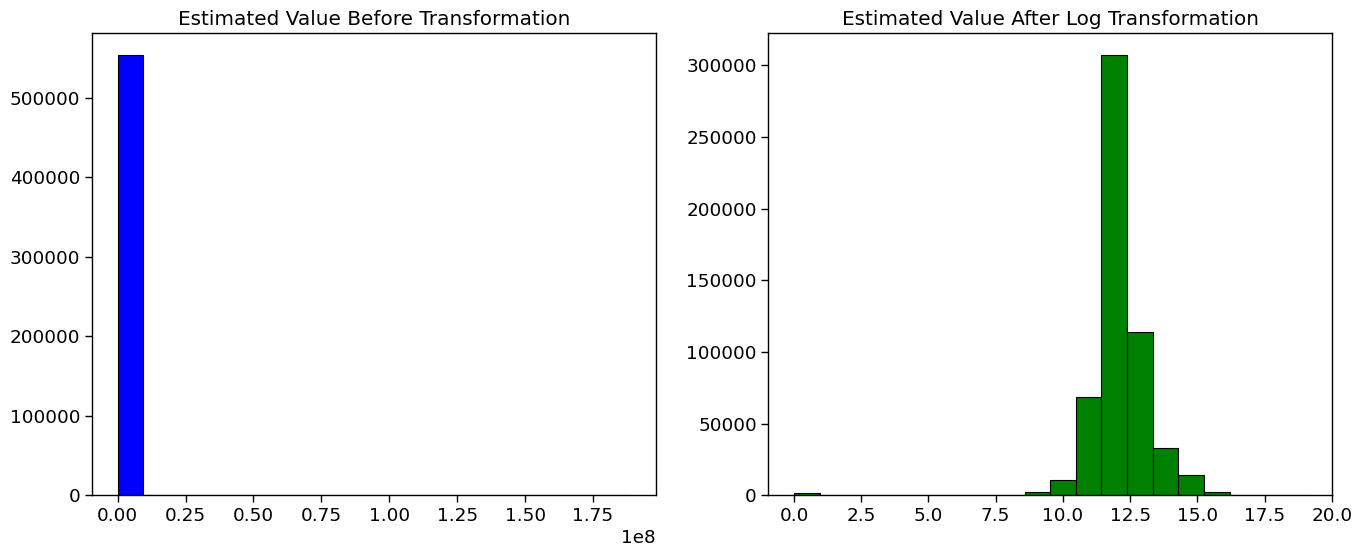

In [103]:
from copy import deepcopy
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats


def log1p_transformation(val):
    return np.log1p(val)

num_cols = ['crime_rate','carpet_area','property_tax_rate','Estimated Value']

temp_df = deepcopy(df[num_cols])
#temp_df1 = deepcopy(df[num_cols])  # Fixed typo in this line

for col in num_cols:
    plt.figure(figsize=(16, 6))

    # Original distribution plot (histogram)
    plt.subplot(121)  # Adjusted subplot index
    plt.hist(df[col], bins=20, color='blue', edgecolor='black')
    plt.title(f'{col} Before Transformation')

    # Log transformation plot
    temp_df[col] = df[col].apply(log1p_transformation)
    plt.subplot(122)  # Adjusted subplot index
    plt.hist(temp_df[col], bins=20, color='green', edgecolor='black')
    plt.title(f'{col} After Log Transformation')


    #plt.tight_layout()  # Ensures proper spacing between subplots
plt.show()


In [104]:
df.drop(columns=['Year','specifications','day','month','Address','Address','distance_to_school','nearby_restaurants','public_transport_availability'],inplace=True)
df_test.drop(columns=['Year','specifications','day','month','Address','distance_to_school','nearby_restaurants','public_transport_availability'],inplace=True)

In [105]:
X = df.drop(columns=['Sale Price'])
y = df['Sale Price']

In [106]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [107]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((443158, 10), (110790, 10), (443158,), (110790,))

In [108]:
X_train

,crime_rate,renovation_level,num_rooms,Property,amenities_rating,carpet_area,property_tax_rate,Locality,Residential,Estimated Value
531007,4.511836,Minor,2,8,Exceptional,656.0,1.003979,Newington,Condominium,136110.0
236991,0.728395,Basic,2,8,Below Average,657.0,1.348259,Manchester,Condominium,46900.0
139042,2.103075,Minor,3,1,Outstanding,1000.0,1.021958,Stratford,Detached House,116900.0
30353,5.699977,Extensive,3,1,Exceptional,952.0,1.025953,Weston,Detached House,466690.0
506498,1.399827,Essential,3,1,Unimpressive,1013.0,1.003979,Hamden,Detached House,138950.0
...,...,...,...,...,...,...,...,...,...,...
110268,1.637676,Basic,3,1,Unimpressive,957.0,1.021958,Waterbury,Detached House,154120.0
259179,8.169682,Complete,3,1,Mediocre,1050.0,1.348259,Meriden,Detached House,116200.0
365839,3.438327,Minor,3,1,Luxurious,982.0,1.025899,Stamford,Detached House,265060.0
131932,2.795619,Minor,2,8,Superb,715.0,1.021958,Naugatuck,Condominium,83800.0


In [109]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline, FeatureUnion
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import RobustScaler, OneHotEncoder, OrdinalEncoder, FunctionTransformer
import numpy as np

#def custom_num_rooms_transformer(X):
#    return X.map({'Two rooms': 2, 'Three rooms': 3, 'Six rooms': 6, 'Four rooms': 4, 'Eight rooms': 8})

numeric_cols = [0, 5,6,9]
categorical_cols_ohe = [7,8]
categorical_cols_ord = [1, 4]

numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('log_transformer', FunctionTransformer(np.log1p, validate=True)),
    ('scaler', RobustScaler())
])

categorical_transformer_ohe = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(sparse=False))
])

categorical_transformer_ord = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('ordinal', OrdinalEncoder())
])



preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_cols),
        ('cat_ohe', categorical_transformer_ohe, categorical_cols_ohe),
        ('cat_ord', categorical_transformer_ord, categorical_cols_ord)
    ],remainder='passthrough')


In [110]:
X_train = preprocessor.fit_transform(X_train)
X_test = preprocessor.transform(X_test)

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [ ]:
from xgboost import XGBRegressor
model = XGBRegressor(random_state=42)

In [ ]:
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

mae = mean_absolute_error(y_test, y_pred)
print(f'Mean Absolute Error: {mae}')

# MSE (Mean Squared Error)
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')

# R2 Score
r2 = r2_score(y_test, y_pred)
print(f'R-squared (R2) Score: {r2}')


Mean Absolute Error: 94059.93282537335
Mean Squared Error: 149769956389.07443
R-squared (R2) Score: 0.6018091869936495


## Linear Regression

In [ ]:
from sklearn.linear_model import LinearRegression
linear_reg_model = LinearRegression()
linear_reg_model.fit(X_train, y_train)
y_pred = linear_reg_model.predict(X_test)

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

mae = mean_absolute_error(y_test, y_pred)
print(f'Mean Absolute Error: {mae}')

# MSE (Mean Squared Error)
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')

# R2 Score
r2 = r2_score(y_test, y_pred)
print(f'R-squared (R2) Score: {r2}')


Mean Absolute Error: 156813.499294347
Mean Squared Error: 252441234522.49
R-squared (R2) Score: 0.328838821654555


## Support Vector Regression (SVR)

In [ ]:
from sklearn.svm import SVR
svr_model = SVR(kernel='linear')  # You can choose different kernels
svr_model.fit(X_train, y_train)
y_pred = svr_model.predict(X_test)

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

mae = mean_absolute_error(y_test, y_pred)
print(f'Mean Absolute Error: {mae}')

# MSE (Mean Squared Error)
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')

# R2 Score
r2 = r2_score(y_test, y_pred)
print(f'R-squared (R2) Score: {r2}')


In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

mae = mean_absolute_error(y_test, y_pred)
print(f'Mean Absolute Error: {mae}')

# MSE (Mean Squared Error)
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')

# R2 Score
r2 = r2_score(y_test, y_pred)
print(f'R-squared (R2) Score: {r2}')


Mean Absolute Error: 92535.69327804972
Mean Squared Error: 128625914738.32283
R-squared (R2) Score: 0.6244013020557181


In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

mae = mean_absolute_error(y_test, y_pred)
print(f'Mean Absolute Error: {mae}')

# MSE (Mean Squared Error)
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')

# R2 Score
r2 = r2_score(y_test, y_pred)
print(f'R-squared (R2) Score: {r2}')


Mean Absolute Error: 92535.69327804972
Mean Squared Error: 128625914738.32283
R-squared (R2) Score: 0.6244013020557181


## Random Forest

In [ ]:
from sklearn.ensemble import RandomForestRegressor

In [ ]:
pipeline = RandomForestRegressor(random_state=42)

pipeline.fit(X_train, y_train)

y_pred = pipeline.predict(X_test)

C:\Users\LENOVO\AppData\Roaming\Python\Python310\site-packages\sklearn\preprocessing\_encoders.py:828: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Assuming y_true and y_pred are your true and predicted values, respectively
# Replace them with your actual true and predicted values

# MAE (Mean Absolute Error)
mae = mean_absolute_error(y_test, y_pred)
print(f'Mean Absolute Error: {mae}')

# MSE (Mean Squared Error)
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')

# R2 Score
r2 = r2_score(y_test, y_pred)
print(f'R-squared (R2) Score: {r2}')


Mean Absolute Error: 89336.85131119385
Mean Squared Error: 134034416750.20215
R-squared (R2) Score: 0.6086080125181965


In [111]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR


In [112]:
dt = DecisionTreeRegressor()
knn = KNeighborsRegressor()
rf = RandomForestRegressor()
gb = GradientBoostingRegressor()
svr = SVR()

In [113]:
dt.fit(X_train,y_train)
knn.fit(X_train,y_train)
rf.fit(X_train,y_train)
gb.fit(X_train,y_train)

GradientBoostingRegressor()

In [114]:
y_pred_dt = dt.predict(X_test)
y_pred_knn = knn.predict(X_test)
y_pred_rf = rf.predict(X_test)
y_pred_gb = gb.predict(X_test)

In [115]:
from sklearn.metrics import r2_score, mean_squared_error
import numpy as np

# Assuming y_pred_dt, y_pred_knn, y_pred_rf, and y_pred_gb are your predictions
# and y_test is your true values

# Calculate R^2 scores
print("R^2 score for DT:", r2_score(y_test, y_pred_dt))
print("R^2 score for KNN:", r2_score(y_test, y_pred_knn))
print("R^2 score for RF:", r2_score(y_test, y_pred_rf))
print("R^2 score for GBoosting:", r2_score(y_test, y_pred_gb))



R^2 score for DT: 0.2677589994536067
R^2 score for KNN: 0.42102120533792453
R^2 score for RF: 0.6051123125581103
R^2 score for GBoosting: 0.5555779332222669


In [116]:
# Calculate RMSE
rmse_dt = np.sqrt(mean_squared_error(y_test, y_pred_dt))
rmse_knn = np.sqrt(mean_squared_error(y_test, y_pred_knn))
rmse_rf = np.sqrt(mean_squared_error(y_test, y_pred_rf))
rmse_gb = np.sqrt(mean_squared_error(y_test, y_pred_gb))

print("RMSE for DT:", rmse_dt)
print("RMSE for KNN:", rmse_knn)
print("RMSE for RF:", rmse_rf)
print("RMSE for GBoosting:", rmse_gb)

RMSE for DT: 500759.52697344025
RMSE for KNN: 445280.34761418705
RMSE for RF: 367738.4112713389
RMSE for GBoosting: 390121.60877893935


In [117]:
from sklearn.ensemble import BaggingRegressor

bag_regressor = BaggingRegressor(random_state=1)
bag_regressor.fit(X_train, y_train)

BaggingRegressor(random_state=1)

In [119]:
Y_preds = bag_regressor.predict(X_test)
print('Training Coefficient of R^2 : %.3f'%bag_regressor.score(X_train, y_train))
print('Test Coefficient of R^2 : %.3f'%bag_regressor.score(X_test, y_test))

Training Coefficient of R^2 : 0.933
Test Coefficient of R^2 : 0.569


In [120]:
regressor = GradientBoostingRegressor()
regressor.fit(X_train, y_train)
y_pred = regressor.predict(X_test)

In [122]:
from sklearn.metrics import r2_score, mean_squared_error,mean_absolute_error
import numpy as np

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

In [123]:
print("Mean Absolute Error:", mae)
print("Mean Squared Error:", mse)
print("Root Mean Squared Error:", rmse)
print("R2-squared:", r2)

Mean Absolute Error: 114853.5892214784
Mean Squared Error: 152194869636.2678
Root Mean Squared Error: 390121.60877893935
R2-squared: 0.5555779332222669


### XGBoost Hyperparameter Tuning:

In [ ]:
from xgboost import XGBRegressor
from sklearn.model_selection import GridSearchCV

# Create XGBoost regressor
xgb_regressor = XGBRegressor()

# Define the parameter grid for tuning
param_grid_xgb = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 4, 5]
}

# Perform GridSearchCV
grid_search_xgb = GridSearchCV(xgb_regressor, param_grid=param_grid_xgb, cv=3, scoring='neg_mean_squared_error')
grid_search_xgb.fit(X_train, y_train)

# Get the best parameters
best_params_xgb = grid_search_xgb.best_params_

# Train the model with the best parameters
xgb_regressor_best = XGBRegressor(**best_params_xgb)
xgb_regressor_best.fit(X_train, y_train)
y_pred_xgb = xgb_regressor_best.predict(X_test)


In [ ]:
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
import numpy as np

def evaluate_model(model, X_test, y_test):
    y_pred = model.predict(X_test)
    r2 = r2_score(y_test, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    mae = mean_absolute_error(y_test, y_pred)
    return r2, rmse, mae

# Assuming you have tuned models: xgb_regressor_best, bagging_regressor_best, gb_regressor_best

# Evaluate XGBoost
r2_xgb, rmse_xgb, mae_xgb = evaluate_model(xgb_regressor_best, X_test, y_test)
print("Metrics for XGBoost:")
print("R-squared:", r2_xgb)
print("RMSE:", rmse_xgb)
print("MAE:", mae_xgb)
print()

# Evaluate BaggingRegressor
r2_bagging, rmse_bagging, mae_bagging = evaluate_model(bagging_regressor_best, X_test, y_test)
print("Metrics for BaggingRegressor:")
print("R-squared:", r2_bagging)
print("RMSE:", rmse_bagging)
print("MAE:", mae_bagging)
print()

# Evaluate GradientBoostingRegressor
r2_gb, rmse_gb, mae_gb = evaluate_model(gb_regressor_best, X_test, y_test)
print("Metrics for GradientBoostingRegressor:")
print("R-squared:", r2_gb)
print("RMSE:", rmse_gb)
print("MAE:", mae_gb)


### BaggingRegressor Hyperparameter Tuning:

In [ ]:
from sklearn.ensemble import BaggingRegressor
from sklearn.model_selection import GridSearchCV

# Create BaggingRegressor
bagging_regressor = BaggingRegressor()

# Define the parameter grid for tuning
param_grid_bagging = {
    'n_estimators': [10, 20, 30],
    'max_samples': [0.5, 0.7, 1.0],
    'max_features': [0.5, 0.7, 1.0]
}

# Perform GridSearchCV
grid_search_bagging = GridSearchCV(bagging_regressor, param_grid=param_grid_bagging, cv=3, scoring='neg_mean_squared_error')
grid_search_bagging.fit(X_train, y_train)

# Get the best parameters
best_params_bagging = grid_search_bagging.best_params_

# Train the model with the best parameters
bagging_regressor_best = BaggingRegressor(**best_params_bagging)
bagging_regressor_best.fit(X_train, y_train)
y_pred_bagging = bagging_regressor_best.predict(X_test)


In [ ]:
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
import numpy as np

# Assuming you have tuned models: xgb_regressor_best, bagging_regressor_best, gb_regressor_best

# Predictions
y_pred_xgb = xgb_regressor_best.predict(X_test)
y_pred_bagging = bagging_regressor_best.predict(X_test)
y_pred_gb = gb_regressor_best.predict(X_test)

# Calculate R-squared
r2_xgb = r2_score(y_test, y_pred_xgb)
r2_bagging = r2_score(y_test, y_pred_bagging)
r2_gb = r2_score(y_test, y_pred_gb)

# Calculate RMSE
rmse_xgb = np.sqrt(mean_squared_error(y_test, y_pred_xgb))
rmse_bagging = np.sqrt(mean_squared_error(y_test, y_pred_bagging))
rmse_gb = np.sqrt(mean_squared_error(y_test, y_pred_gb))

# Calculate MAE
mae_xgb = mean_absolute_error(y_test, y_pred_xgb)
mae_bagging = mean_absolute_error(y_test, y_pred_bagging)
mae_gb = mean_absolute_error(y_test, y_pred_gb)

# Print results
print("Metrics for XGBoost:")
print("R-squared:", r2_xgb)
print("RMSE:", rmse_xgb)
print("MAE:", mae_xgb)
print()

print("Metrics for BaggingRegressor:")
print("R-squared:", r2_bagging)
print("RMSE:", rmse_bagging)
print("MAE:", mae_bagging)
print()

print("Metrics for GradientBoostingRegressor:")
print("R-squared:", r2_gb)
print("RMSE:", rmse_gb)
print("MAE:", mae_gb)


In [ ]:
X_train,y_train = df.drop(columns=['Sale Price']),df['Sale Price']

# Feature Engineering Pipeline

In [ ]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline, FeatureUnion
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import RobustScaler, OneHotEncoder, OrdinalEncoder, FunctionTransformer
import numpy as np

#def custom_num_rooms_transformer(X):
#    return X.map({'Two rooms': 2, 'Three rooms': 3, 'Six rooms': 6, 'Four rooms': 4, 'Eight rooms': 8})

numeric_cols = [0, 5,6,9]
categorical_cols_ohe = [7,8]
categorical_cols_ord = [1, 4]

numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('log_transformer', FunctionTransformer(np.log1p, validate=True)),
    ('scaler', RobustScaler())
])

categorical_transformer_ohe = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(sparse=False))
])

categorical_transformer_ord = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('ordinal', OrdinalEncoder())
])



preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_cols),
        ('cat_ohe', categorical_transformer_ohe, categorical_cols_ohe),
        ('cat_ord', categorical_transformer_ord, categorical_cols_ord)
    ],remainder='passthrough')


pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                             ('xgboost', XGBRegressor(random_state=42))])

In [ ]:
pipeline.fit(X_train, y_train)

C:\Users\LENOVO\AppData\Roaming\Python\Python310\site-packages\sklearn\preprocessing\_encoders.py:828: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('log_transformer',
                                                                   FunctionTransformer(func=<ufunc 'log1p'>,
                                                                                       validate=True)),
                                                                  ('scaler',
                                                                   RobustScaler())]),
                                                  [0, 5, 6, 9]),
                                                 ('cat_ohe',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  (...
                              feature_types=None, gamma=None, grow_policy=None,
                              importance_type=None,
                              interaction_constraints=None, learning_rate=None,
                              max_bin=None, max_cat_threshold=None,
                              max_cat_to_onehot=None, max_delta_step=None,
                              max_depth=None, max_leaves=None,
                              min_child_weight=None, missing=nan,
                              monotone_constraints=None, multi_strategy=None,
                              n_estimators=None, n_jobs=None,
                              num_parallel_tree=None, random_state=42, ...))])

In [ ]:
import pickle
with open('prediction_pipeline.pkl', 'wb') as file:
    pickle.dump(pipeline, file)

In [ ]:
import pickle
pipe = pickle.load(open('prediction_pipeline.pkl','rb'))

In [ ]:
# Assume user inpu
test_input2 = np.array([2.656826,'Minor',2,8,'Mediocre',760.000000,1.025953,'Greenwich','Condominium',711270.0],dtype=object).reshape(1,10)

In [ ]:
pipe.predict(test_input2)

C:\Users\LENOVO\AppData\Roaming\Python\Python310\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but SimpleImputer was fitted with feature names
  warnings.warn(
C:\Users\LENOVO\AppData\Roaming\Python\Python310\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but SimpleImputer was fitted with feature names
  warnings.warn(
C:\Users\LENOVO\AppData\Roaming\Python\Python310\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but SimpleImputer was fitted with feature names
  warnings.warn(


array([1083591.4], dtype=float32)